# I. Data Preparation and Analysis

# A. Problem statement

You are a Data Scientist at Delta Bank, a company that is aiming to develop a customer experience vision. Part of this vision, one important pillar is the customers retention. As a result, the business officers would want to strengthen the relationship with the clients for keeping them engaged and assessing their needs and pain points. Due to the costs involved, it is not possible to target all the clients of the company. Along with the marketing team, the officers would like to understand why customers are leaving the bank and find the most probable churners.

# B. Import libraries

In [1]:
import numpy as np #for linear algebra
import pandas as pd # for data processing, dataset reading etc
import matplotlib.pyplot as plt #for plotting 
import seaborn as sns #for plotting
import missingno as msno #for outliers, plots

In [2]:
path = 'C:\\Users\\andre\\OneDrive\\Desktop\\Facultate\\Practica\\TTJ project\\dataset\\dataset.csv'

In [3]:
data = pd.read_csv(path)

# D. Exploratory data analysis

#### 1. General

a) View dimensions of dataset

In [4]:
data.shape

(10127, 21)

b) Preview of dataset

In [5]:
data.head(10) #we print the first 10 lines of the dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40.0,F,4.0,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44.0,M,2.0,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51.0,M,4.0,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32.0,M,0.0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37.0,M,3.0,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48.0,M,2.0,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


c) View column names

In [6]:
columns = data.columns
print(columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Used_Bal',
       'Total_Unused_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


d)View types of columns

In [7]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

e) View Information about dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10124 non-null  float64
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10122 non-null  float64
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10125 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

f) View statistical properties of dataset

In [9]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10124.000000,10122.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.326057,2.345781,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.017889,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


View statistical properties for categorical variables

In [10]:
data.describe(include = ['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,10125,10127
unique,2,2,6,3,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3560,9436


## 2. Univariate analysis

We want to analyze our target variable ('Attrition_Flag'), which shows us if churn happened

a) Check if variable has missing values

In [11]:
data['Attrition_Flag'].isnull().sum()

0

We see that we have no missing values

b) View unique values

In [12]:
data['Attrition_Flag'].nunique()

2

In [13]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

Wee see that we have 2 possible values, one shows that the customer is still a client of Delta Bank, and the other one shows that the client has left Delta Bank

c) View frequency of values and percentages of frequency

In [14]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [15]:
data['Attrition_Flag'].value_counts()/len(data)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

We see that from the analysed clients:
- 8500 are still clients of Delta Bank(which represents 83.934% from the total of clients)
- 1627 clients have left Delta Bank(which represents 16.06596% from the total of clients)

d) Visualize frequency distribution of variable 'Attrition_Flag'

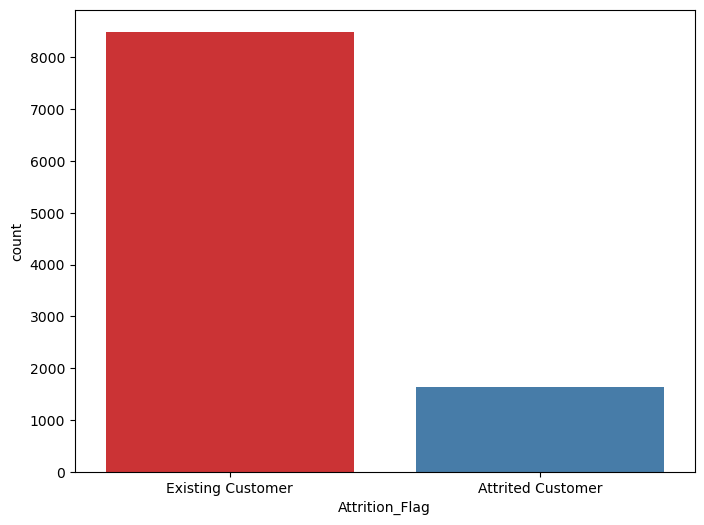

In [16]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(data = data, x = 'Attrition_Flag', palette = 'Set1')
plt.show()

e) Change labels of variable 'Attrition_Flag' to numeric

In [17]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Attrited Customer' : 1, 'Existing Customer' :0 })

In [18]:
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

## 3. Feature analysis

### 3.1 Categorical variables

a) Explore categorical variables

In [19]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Cateogorical variables are of type 'object'

We store all the columns that contains categorical values in a list

In [20]:
categorical_columns =[col for col in data.columns if data[col].dtype == 'object']

In [21]:
print('There are ', len(categorical_columns), 'categorical variables. These are ', categorical_columns)

There are  5 categorical variables. These are  ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


We print the first 5 rows but only with categorical columns

In [22]:
data[categorical_columns].head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,NaN,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


We will check the distribution for the following categorical columns :
- Education_Level
- Income_Category

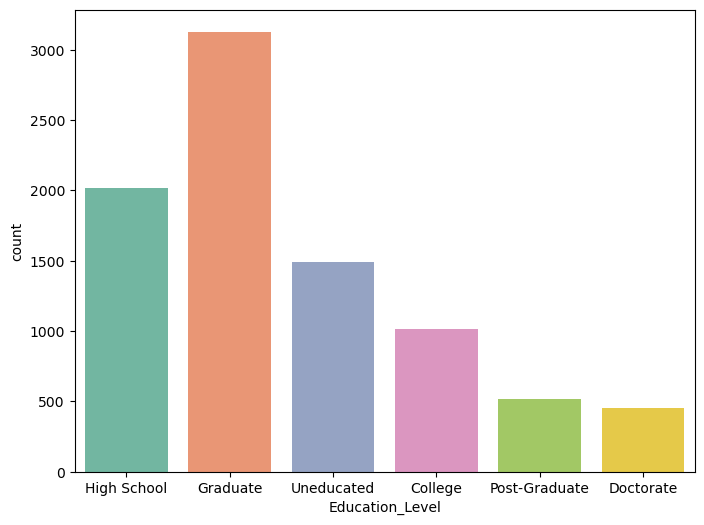

In [23]:
fig, ax = plt.subplots(figsize = (8,6)) #aici ne facem un plot
ax = sns.countplot(data = data, x = 'Education_Level', palette = 'Set2')
plt.show()

We can see the following things: 
- most of Delta Bank's clients are Graduates, which means that they are pursuing a master's or doctorate degree
- the number of high school graduates is approximatively 2000, which means a significant number of the analysed clients are young
- the count of uneducated people among Delta Bank's clients is high

In [24]:
data['Income_Category'] = data['Income_Category'].replace('abc','Unknown')

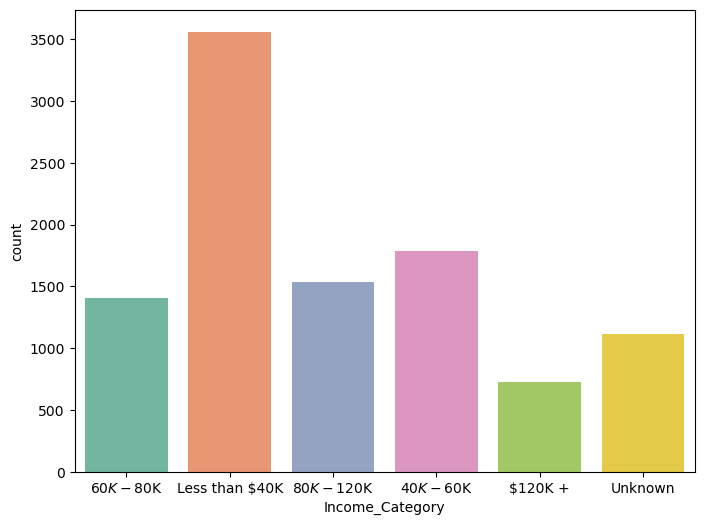

In [25]:
fig, ax = plt.subplots(figsize = (8,6)) #aici ne facem un plot
ax = sns.countplot(data = data, x = 'Income_Category', palette = 'Set2')
plt.show()

We can see the following things:
- aproximatively 3500 out of 10127 analysed clients are making less than $40k per year, which could be a sign that they might have financial problems
- we have a significant number of clients who make between 80K - 120K and even more

Check distribution of categorical variables in relationship with target 'Attrition_Flag'

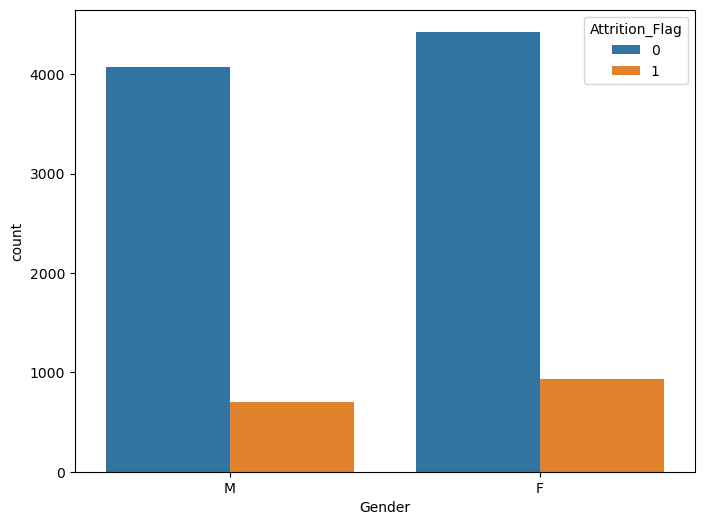

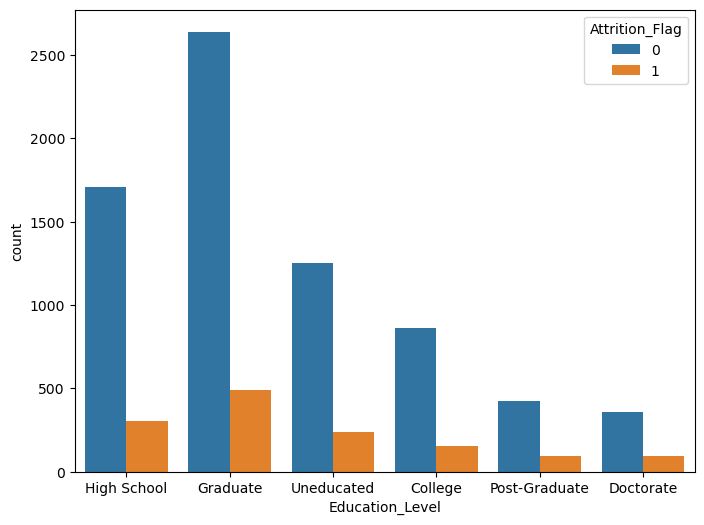

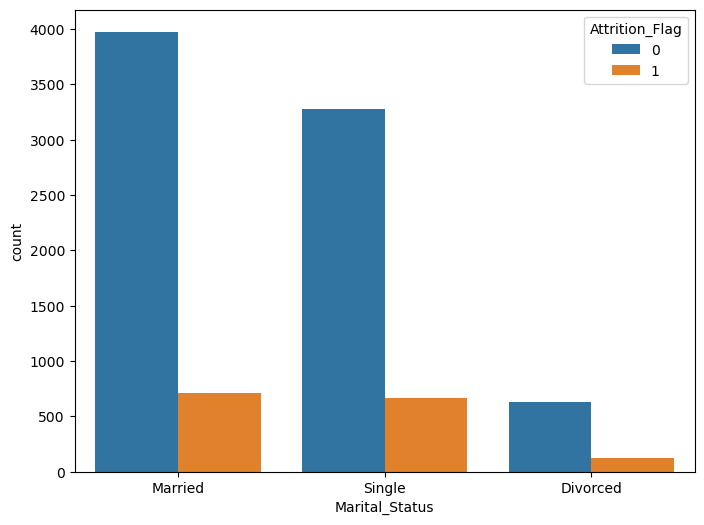

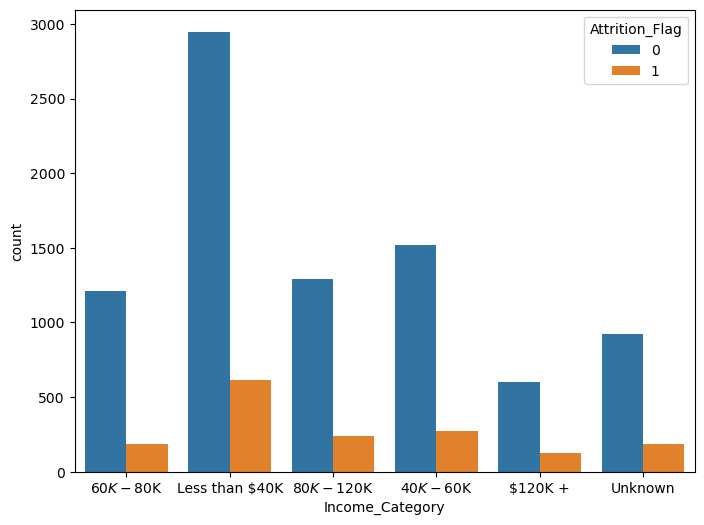

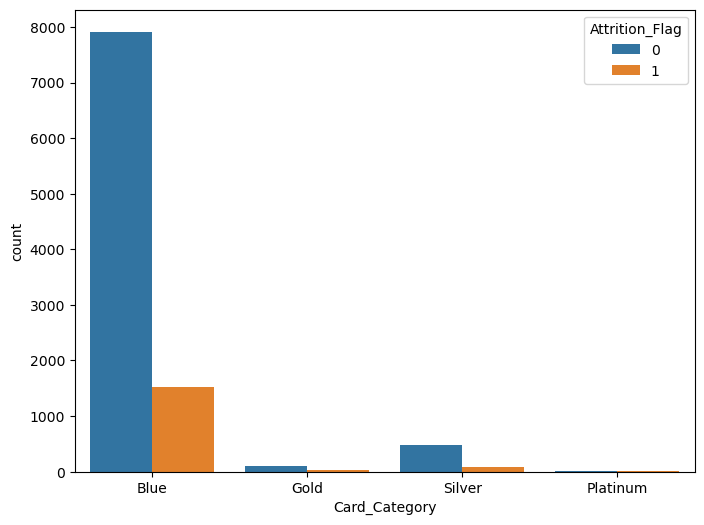

In [26]:
for col in categorical_columns:
    fig, ax = plt.subplots(figsize = (8,6))
    ax = sns.countplot(data = data, x = col, hue = 'Attrition_Flag')
    plt.show()

We can see the following things:
- most of the analyzed clients have a basic card(Blue), and only a few have a premium card like Silver, Gold, or Platinum
- Uneducated people have a small percentage of leaving the bank compared to the ones that stayed

b) Missing values imputation

Firstly, we check to see what categorical variables has missing values

In [27]:
data[categorical_columns].isnull().sum()

Gender                0
Education_Level    1519
Marital_Status      749
Income_Category       2
Card_Category         0
dtype: int64

We want to visualise the missing values

<Axes: >

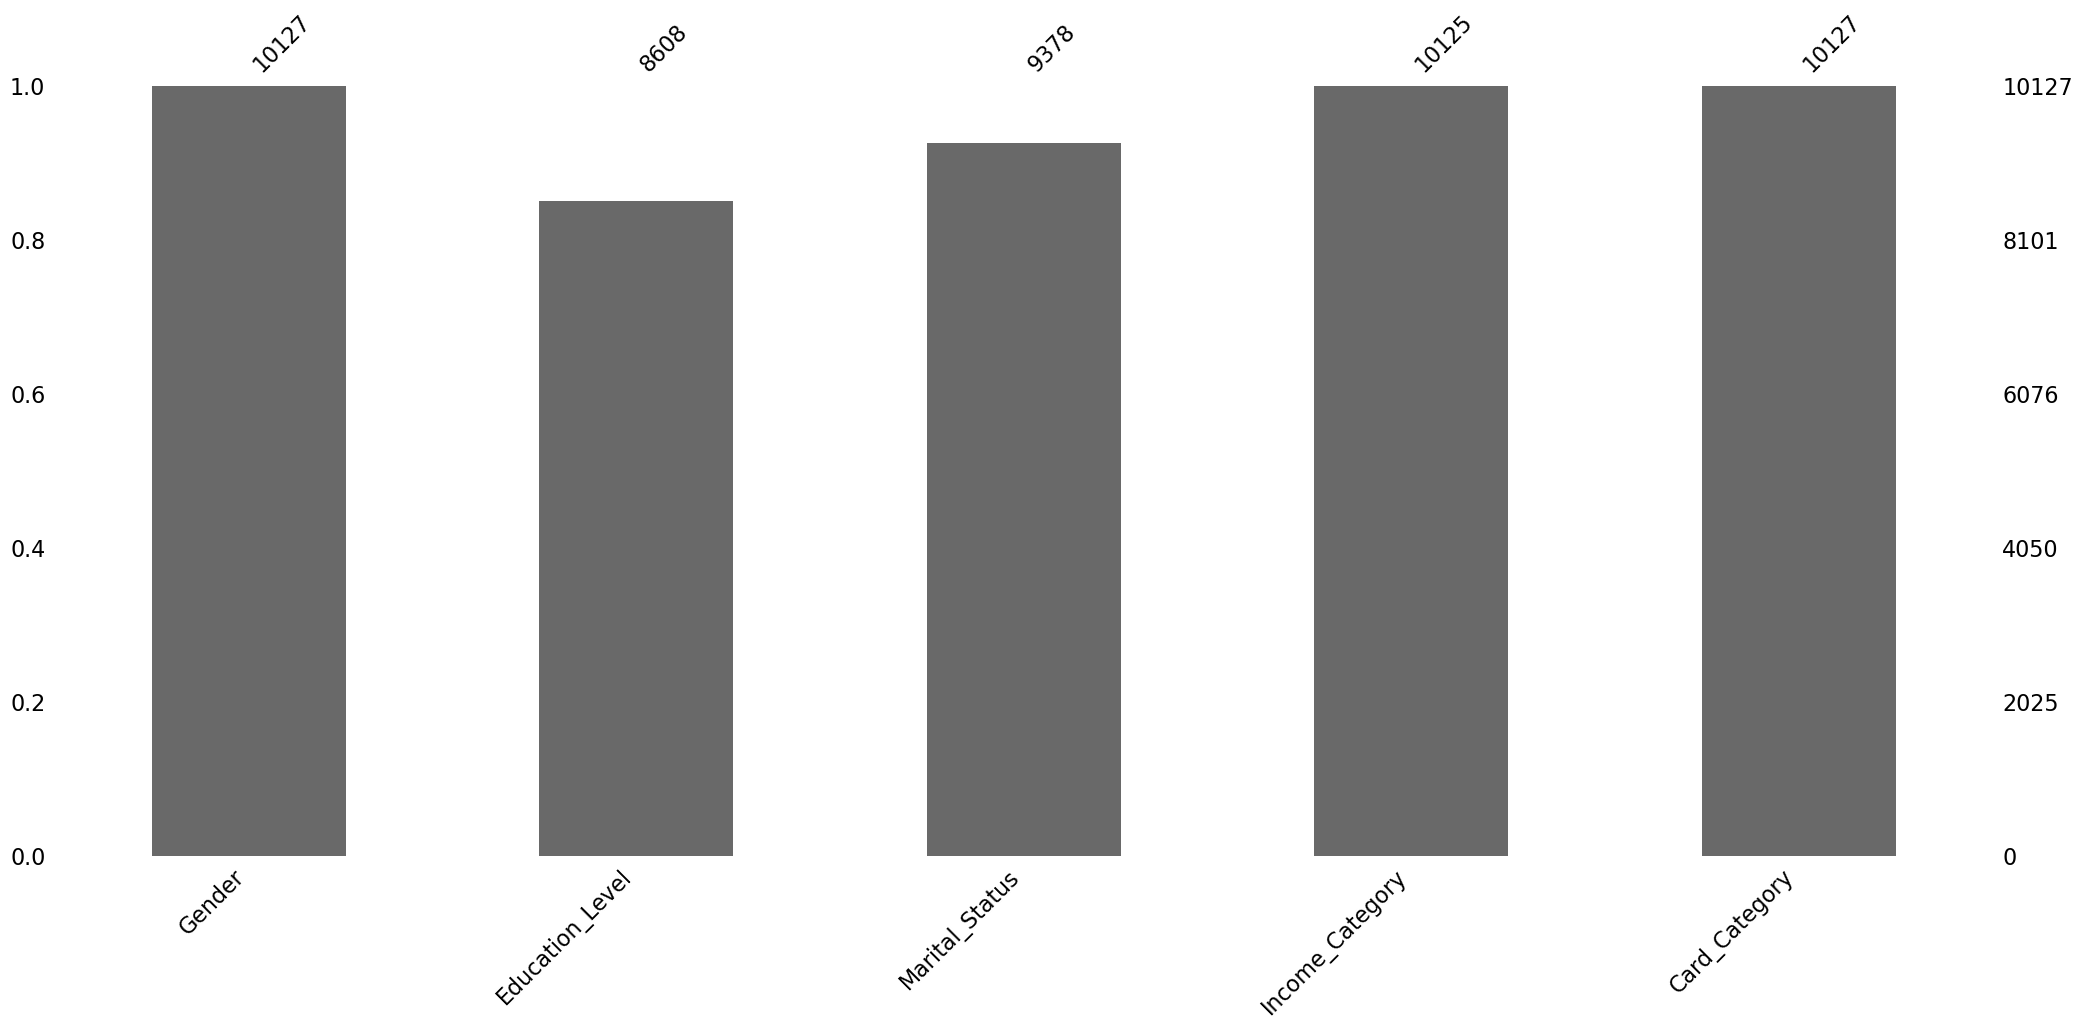

In [28]:
msno.bar(data[categorical_columns])

We see that there are missing values as follows:
- 1519 on 'Education_Level'
- 749 on 'Marital_Status'
- 2 on 'Income_Category'

We are replacing the missing values

In [29]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')

In [30]:
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')

In [31]:
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

We check to see if we still have missing values

In [32]:
data[categorical_columns].isnull().sum()

Gender             0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
dtype: int64

We see that we don't have missing values on categorical variables anymore

c) Feature variance

We will look to see which columns have just one single value

In [33]:
data[categorical_columns].nunique()

Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

We see that there are no categorical variables who has just one value.

d) Categorical encoding

We check the number of different values for each categorical variable.

In [34]:
data[categorical_columns].nunique()

Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

Wee see that there are no categorical variables with too many values

### 3.2 Numerical variables

We create a list 'numerical_columns' that will hold all the columns with numerical values

In [35]:
numerical_columns=[col for col in data.columns if data[col].dtypes!='object' and col!='Attrition_Flag']

In [36]:
print('There are ',len(numerical_columns),'numerical columns. These are',numerical_columns)

There are  15 numerical columns. These are ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Used_Bal', 'Total_Unused_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


We will print the first 5 rows but just with numerical columns

In [37]:
data[numerical_columns].head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,3.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49.0,5.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51.0,3.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40.0,4.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40.0,3.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


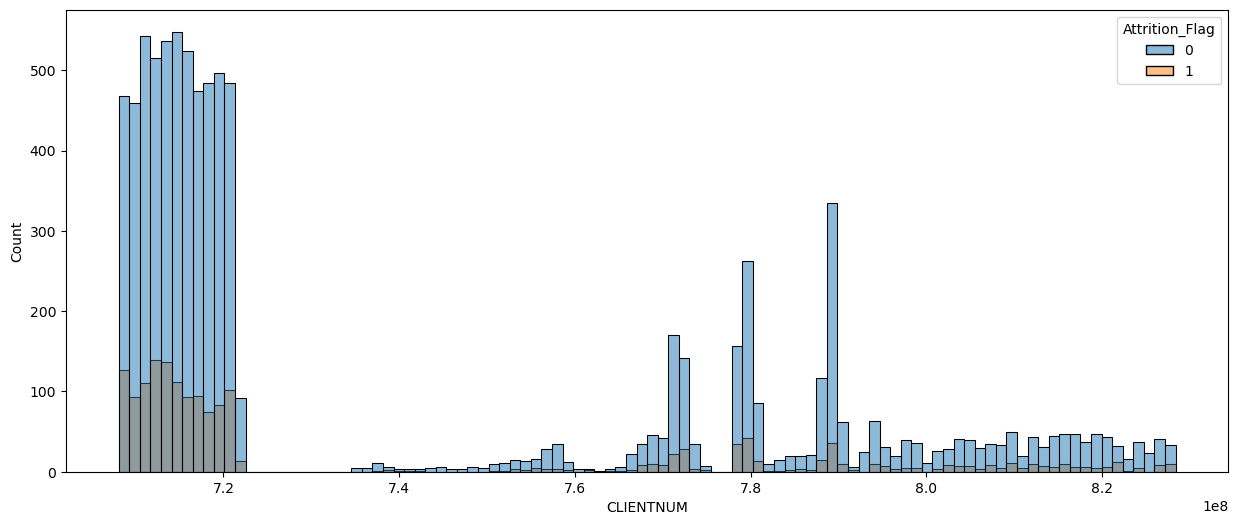

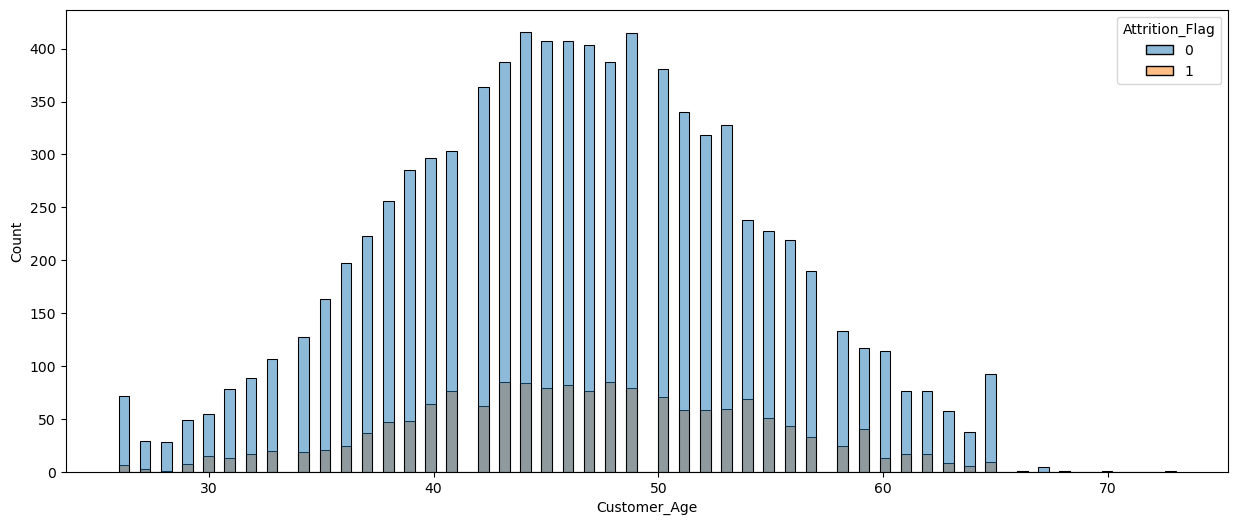

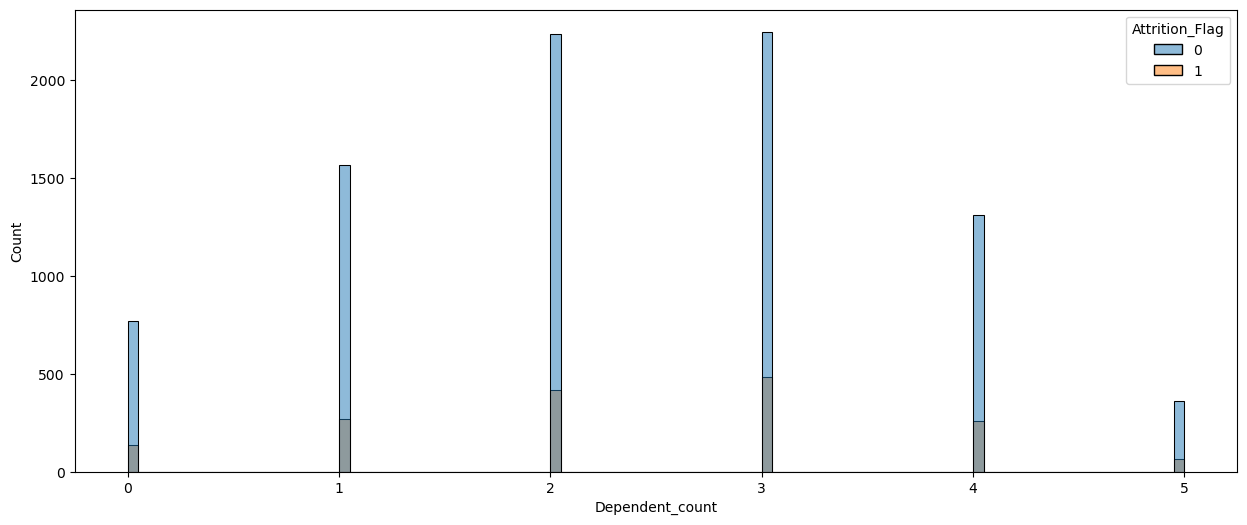

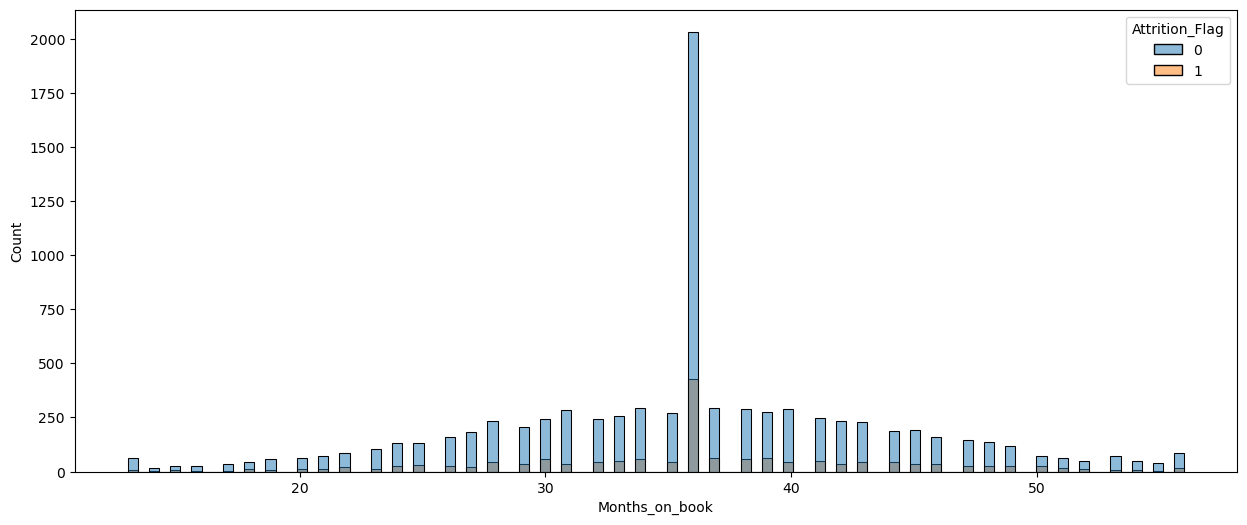

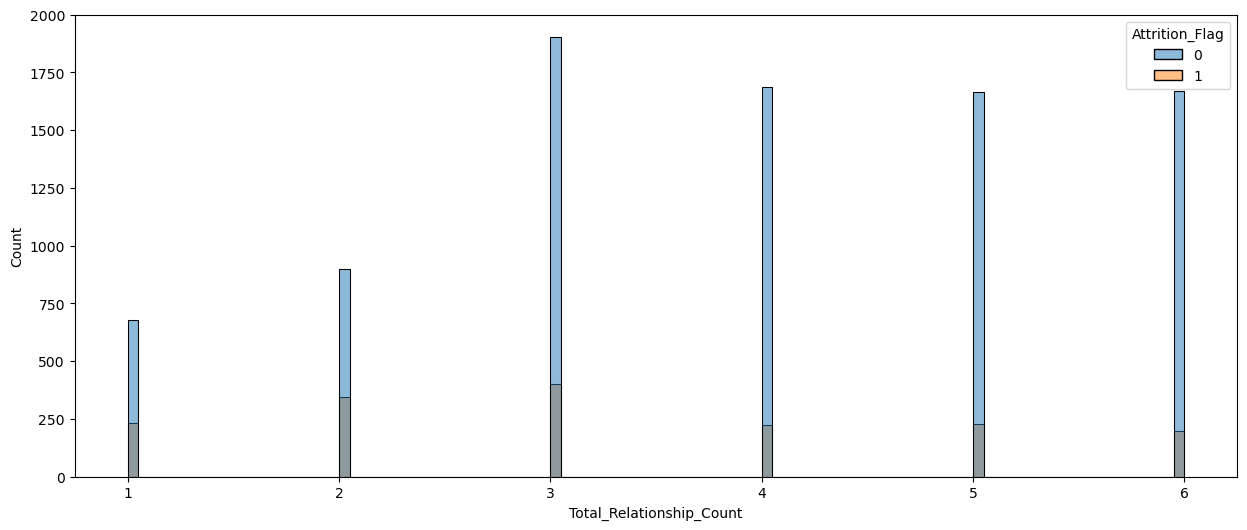

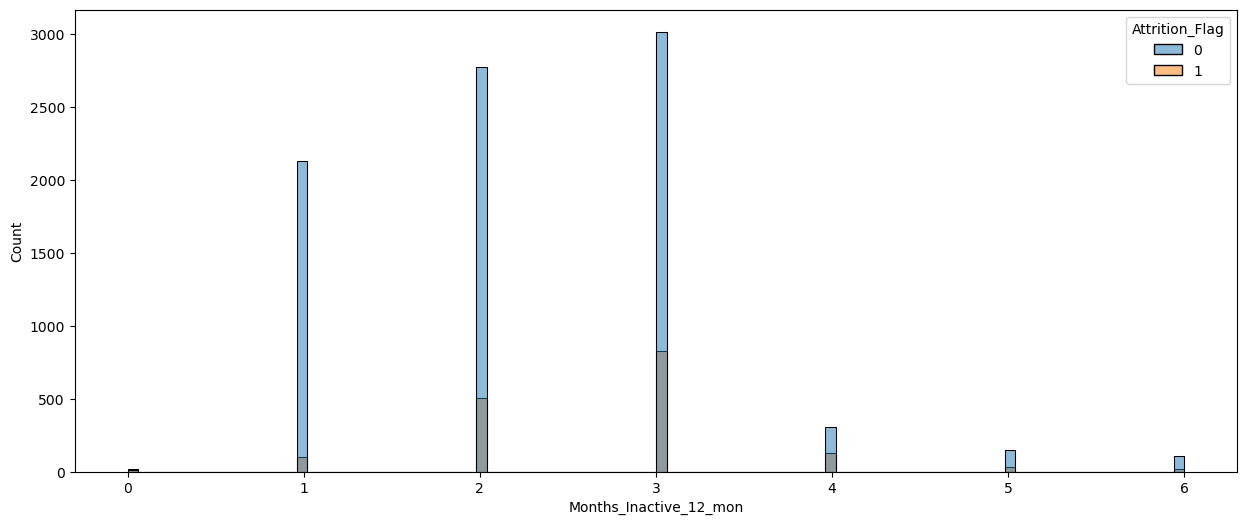

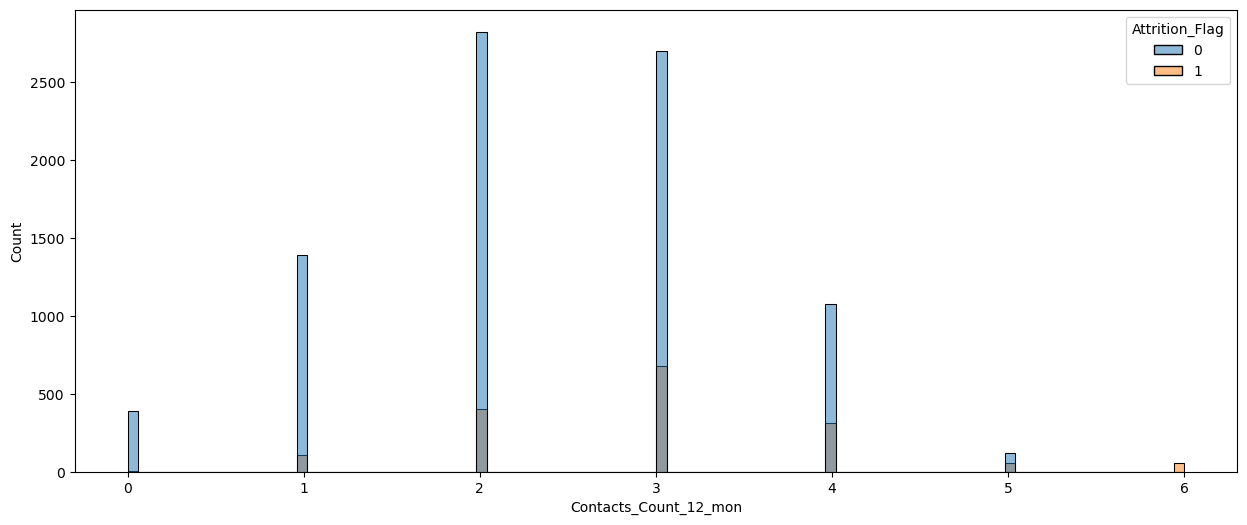

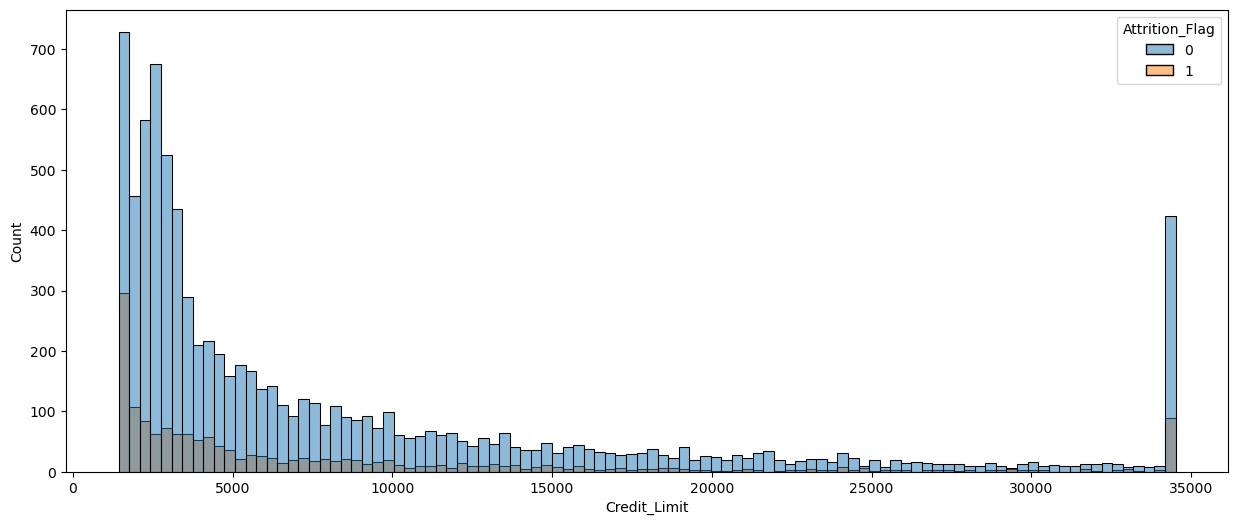

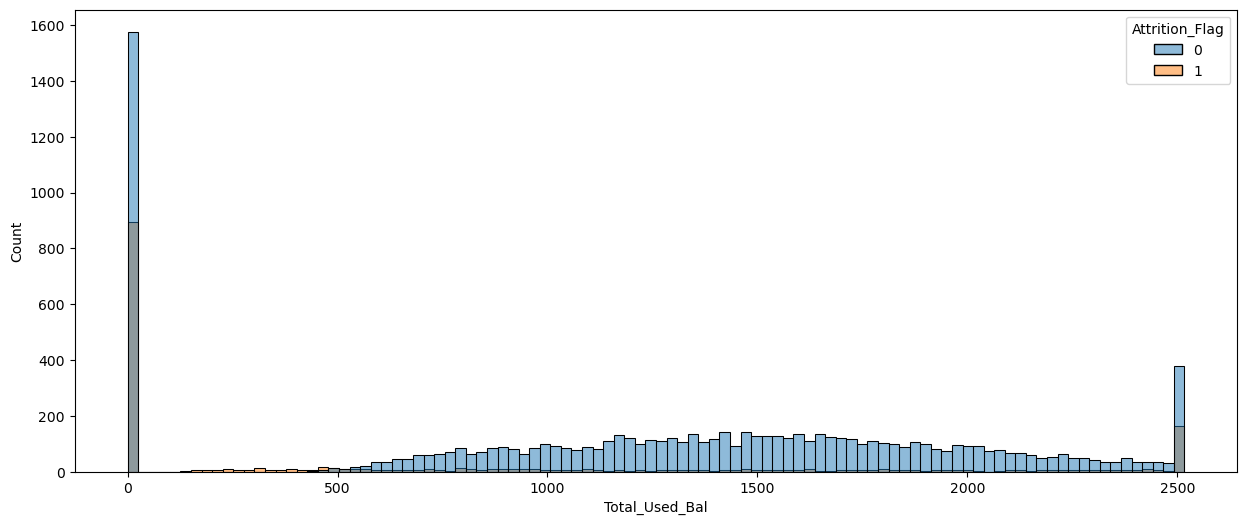

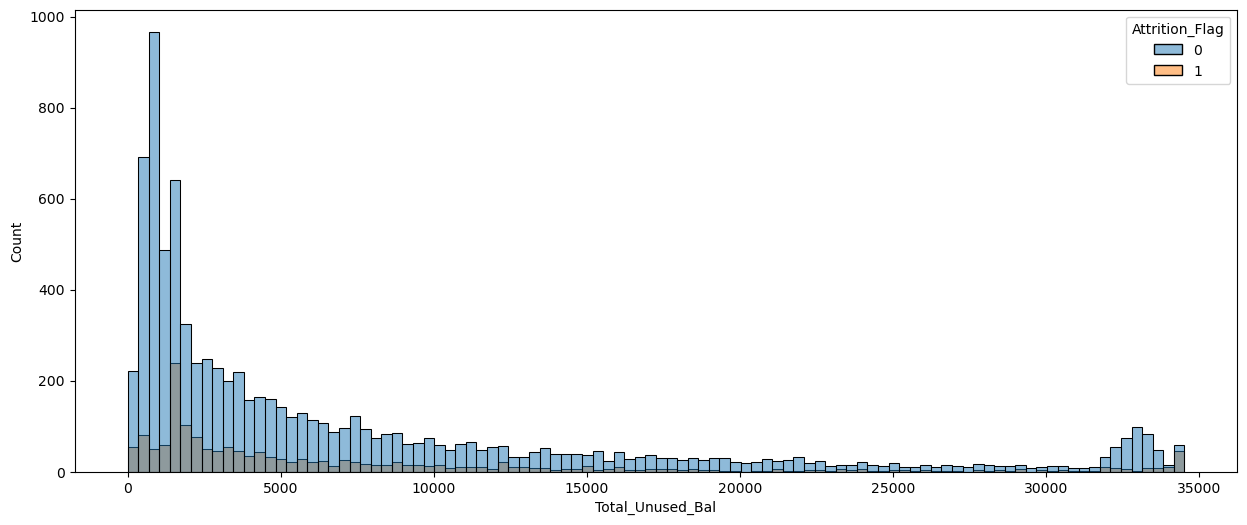

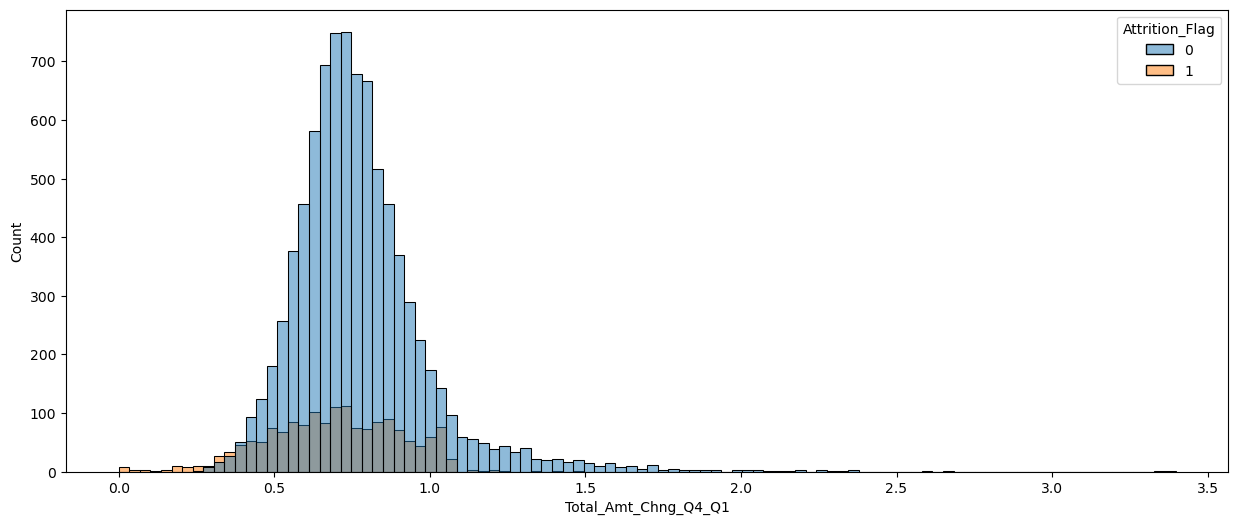

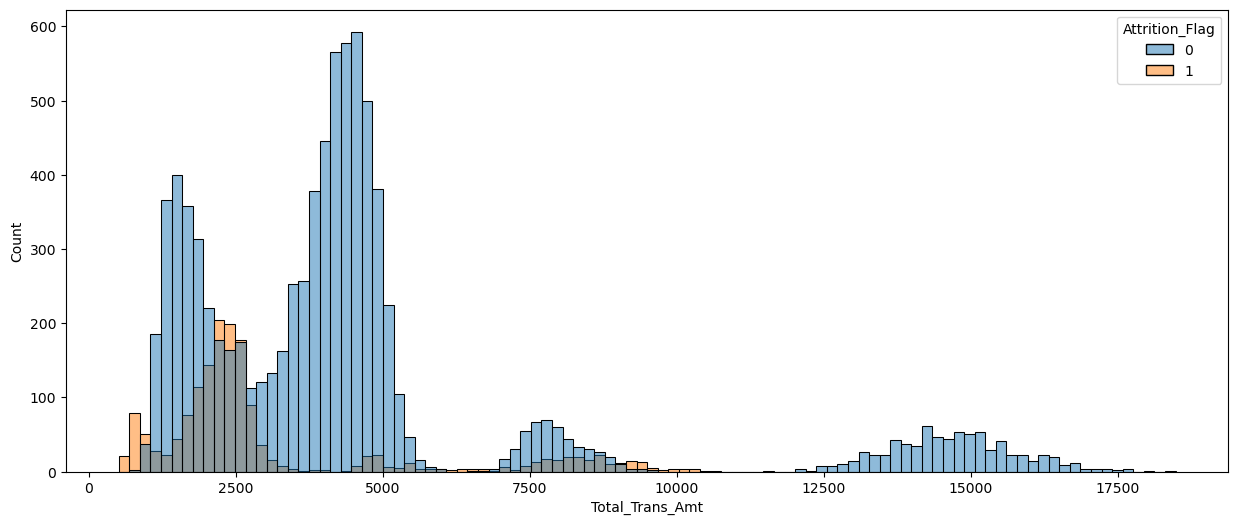

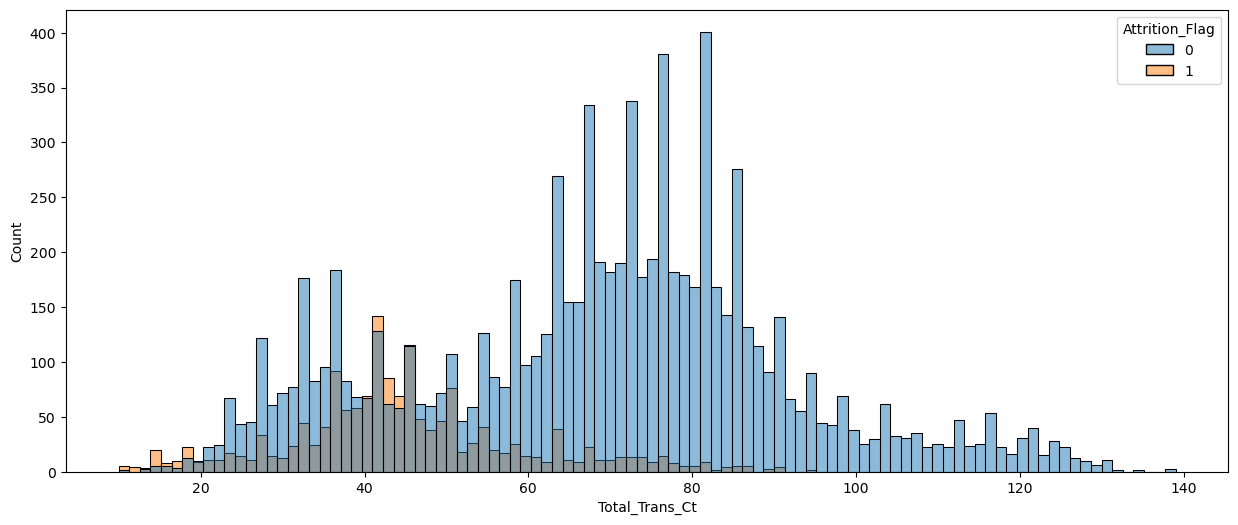

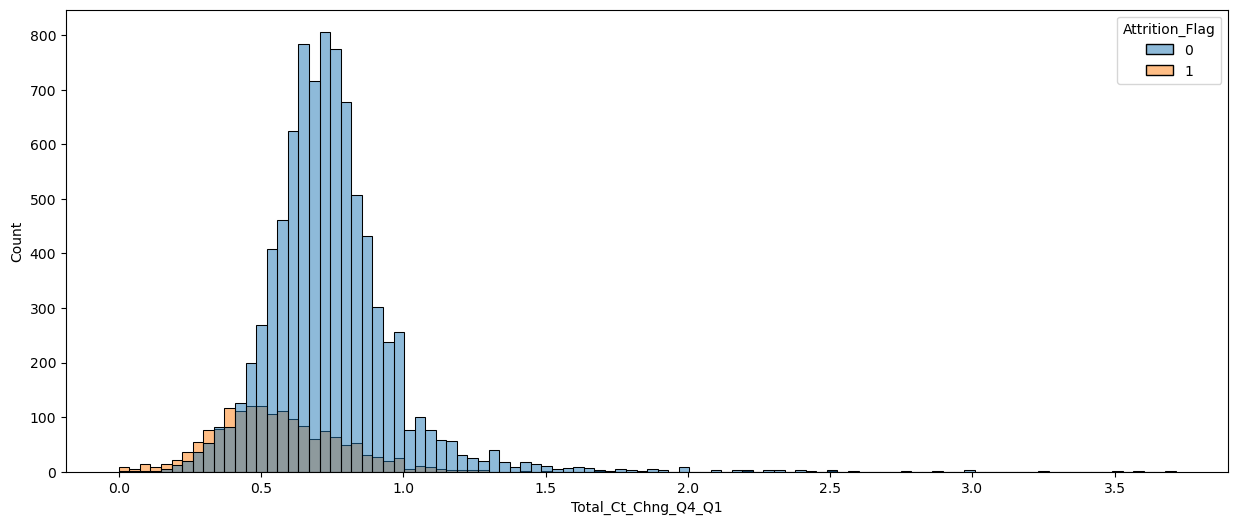

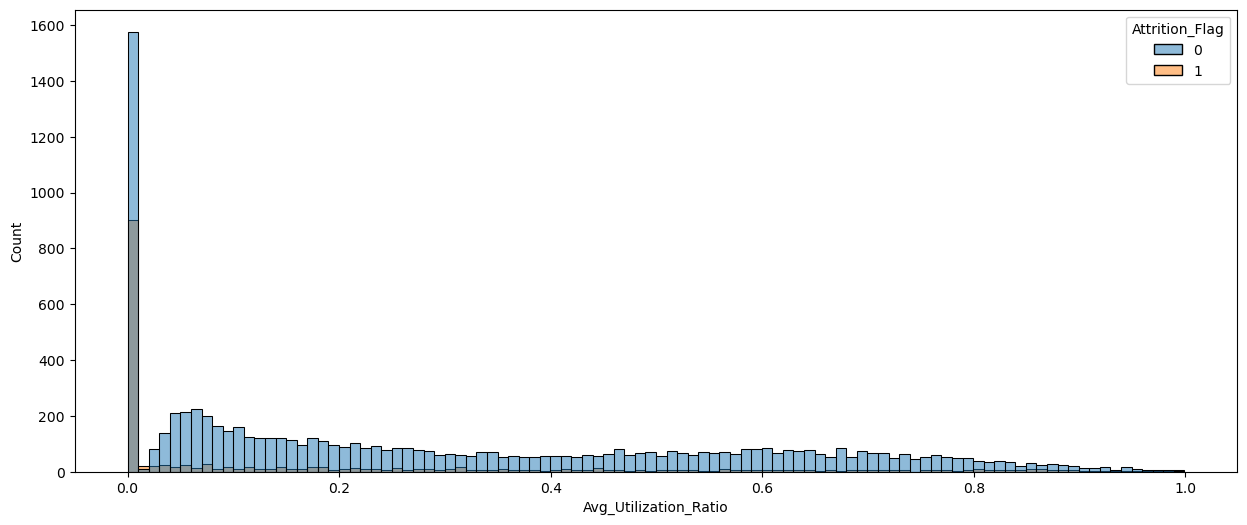

In [38]:
for col in numerical_columns:
    fig,ax=plt.subplots(figsize=(15,6))
    sns.histplot(data= data, x=col, hue='Attrition_Flag',bins = 100)
    plt.show()

b) Missing values imputation

In [39]:
data[numerical_columns].isnull().sum()

CLIENTNUM                   0
Customer_Age                3
Dependent_count             5
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Used_Bal              0
Total_Unused_Bal            0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<Axes: >

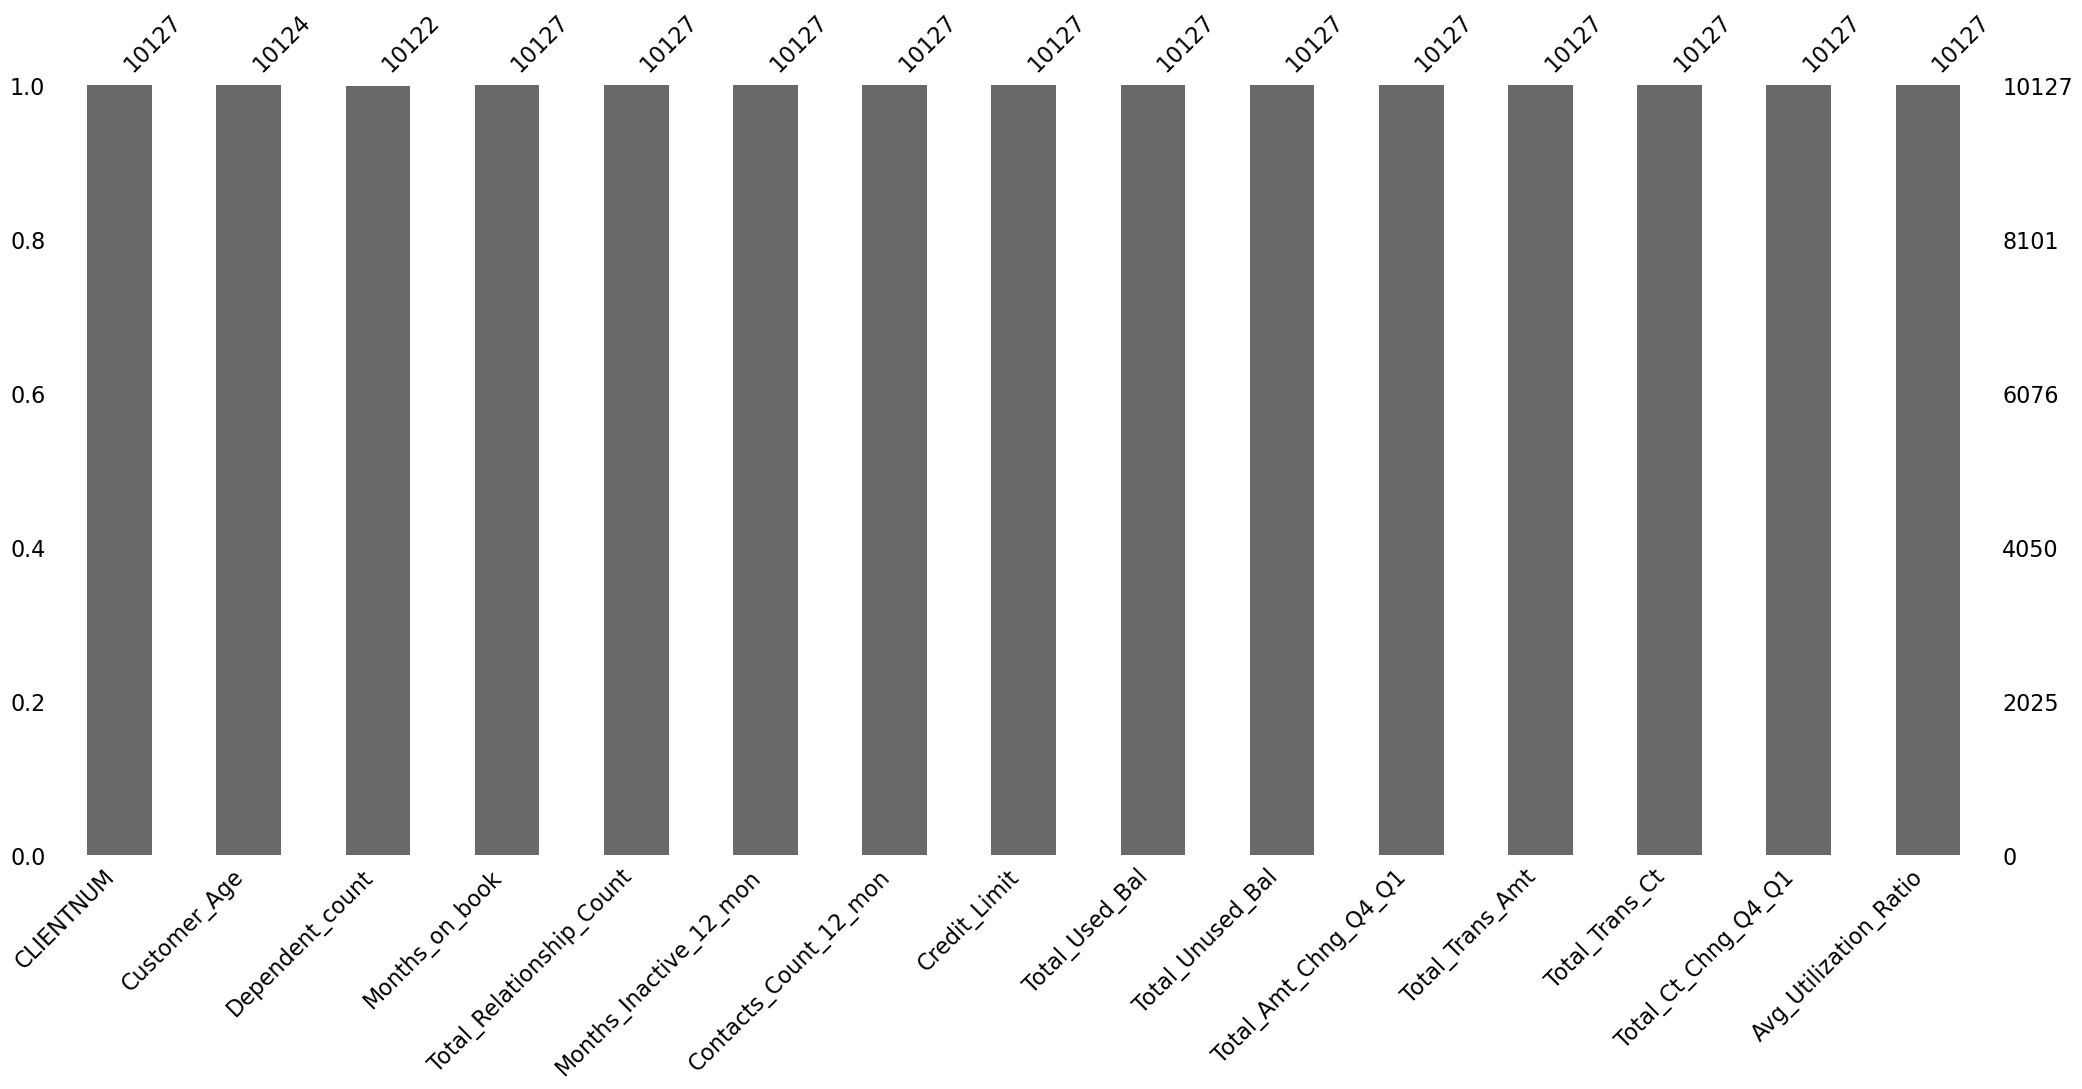

In [40]:
msno.bar(data[numerical_columns])

We see that we have missing values :
- 3 on 'Customer_Age'
- 5 on 'Dependent_count'

This means we have to put default values instead of missing values

In [41]:
data ['Customer_Age']

0        45.0
1        49.0
2        51.0
3        40.0
4        40.0
         ... 
10122    50.0
10123    41.0
10124    44.0
10125    30.0
10126    43.0
Name: Customer_Age, Length: 10127, dtype: float64

We will replace the missing age with the median of all ages.

In [42]:
data['Customer_Age'] =data['Customer_Age'].fillna(data['Customer_Age'].median())

In [43]:
data ['Dependent_count']

0        3.0
1        5.0
2        3.0
3        4.0
4        3.0
        ... 
10122    2.0
10123    2.0
10124    1.0
10125    2.0
10126    2.0
Name: Dependent_count, Length: 10127, dtype: float64

We will replace the missing values with arbitrary values

In [44]:
data['Dependent_count']=data['Dependent_count'].fillna(0)

c) Feature variance

 We want to check how many unique values every column has.

In [45]:
data[numerical_columns].nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Used_Bal               1974
Total_Unused_Bal             6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

We see that there are no columns with one unique value, so we don't need to delete anything

d) Outliers

In [46]:
q1 = data['Customer_Age'].quantile(0.25)
q3 = data['Customer_Age'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 3*IQR
upper_limit = q3 + 3*IQR

In [47]:
data[(data['Customer_Age']<lower_limit) |  (data['Customer_Age'] > upper_limit)]['Customer_Age']

Series([], Name: Customer_Age, dtype: float64)

We can see that we don't have outlier values for Customer_Age column

We will visualise the outliers for Customer_Age

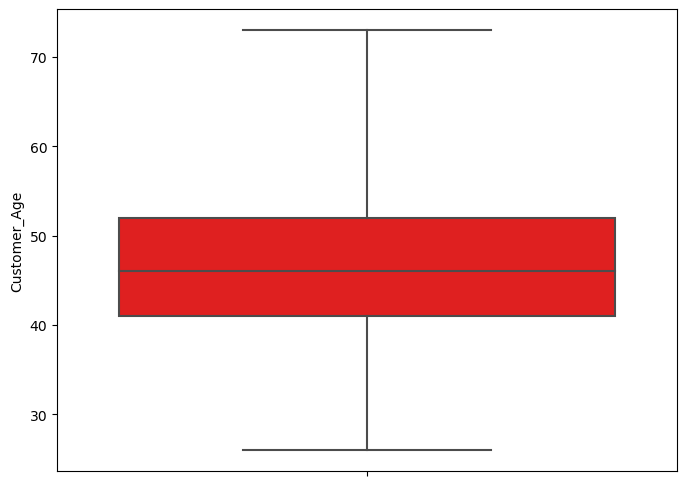

In [48]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(y = data['Customer_Age'], color = 'red', whis = 3)
plt.show()

We will check every column to see if it has outlier values.

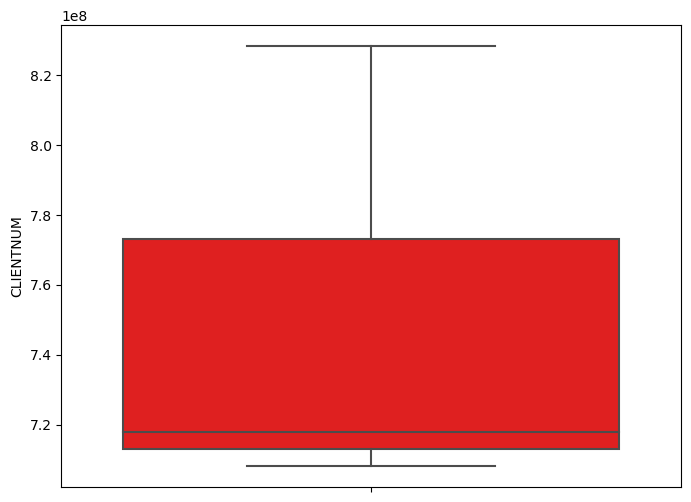

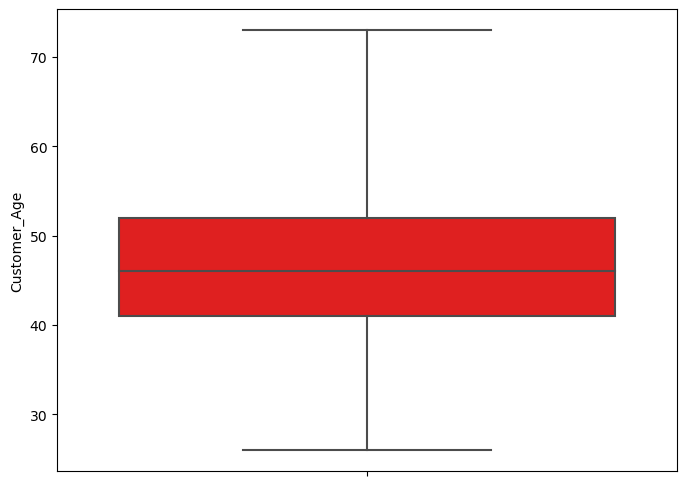

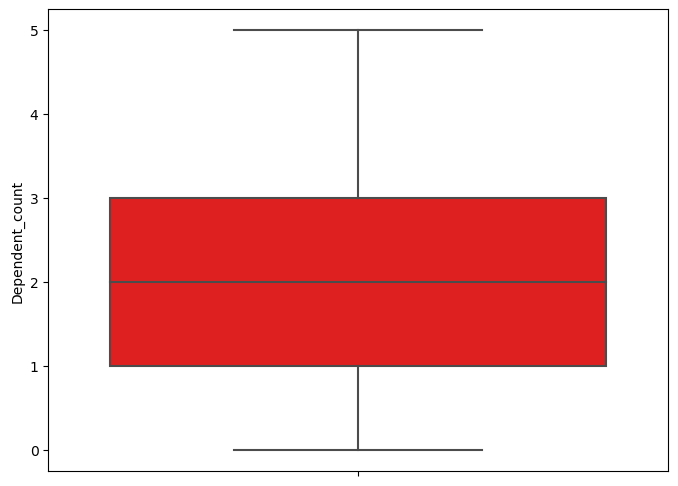

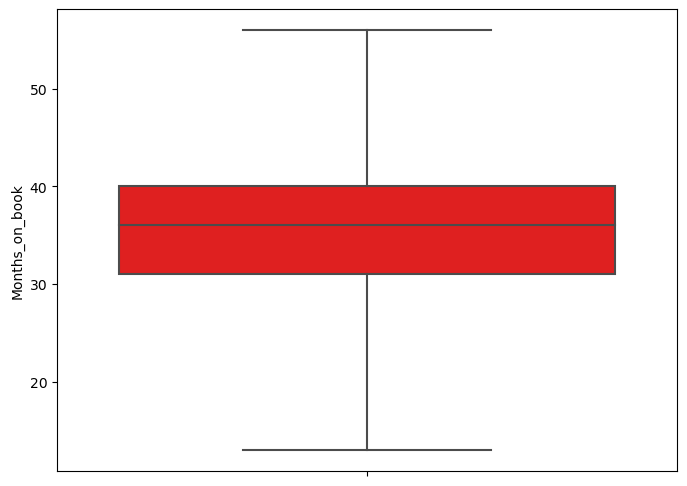

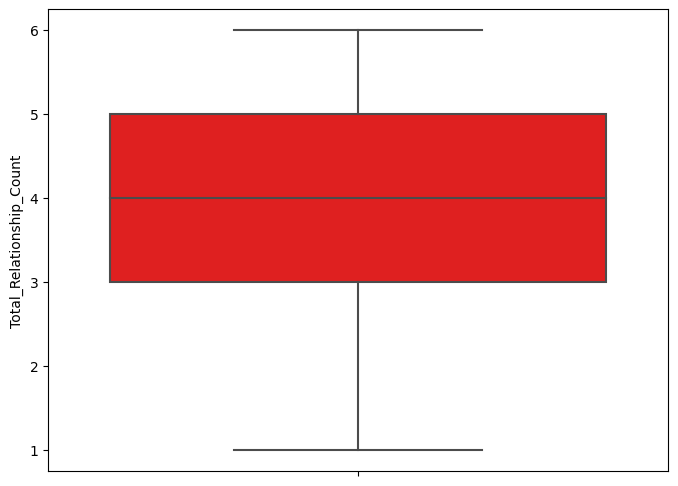

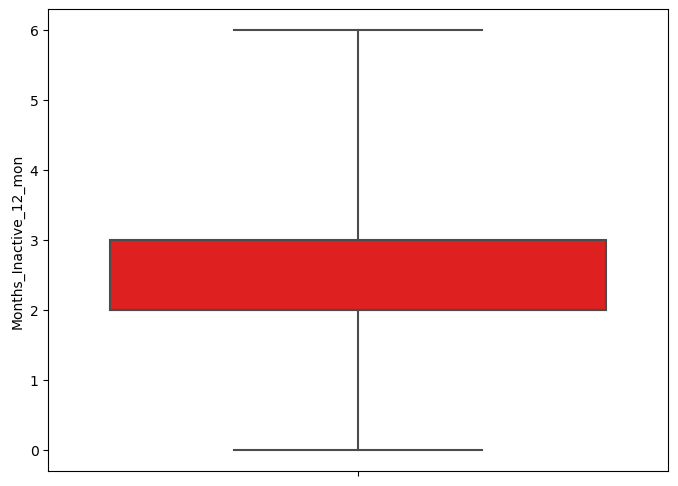

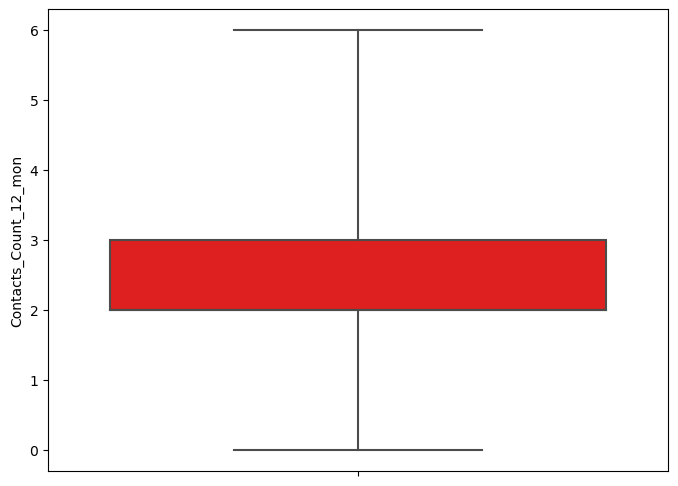

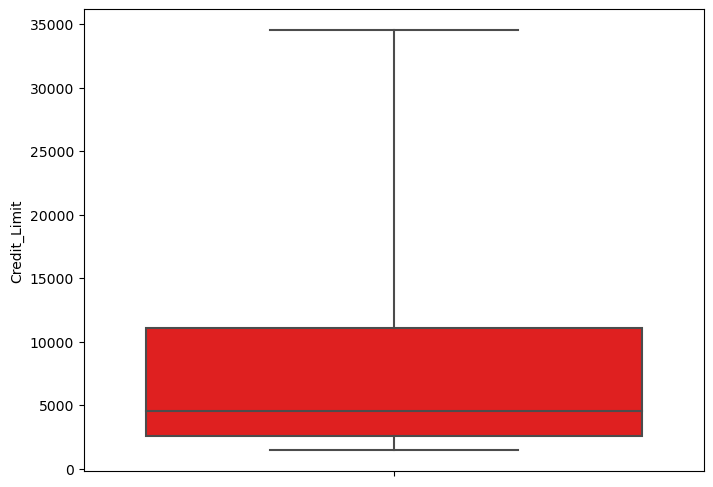

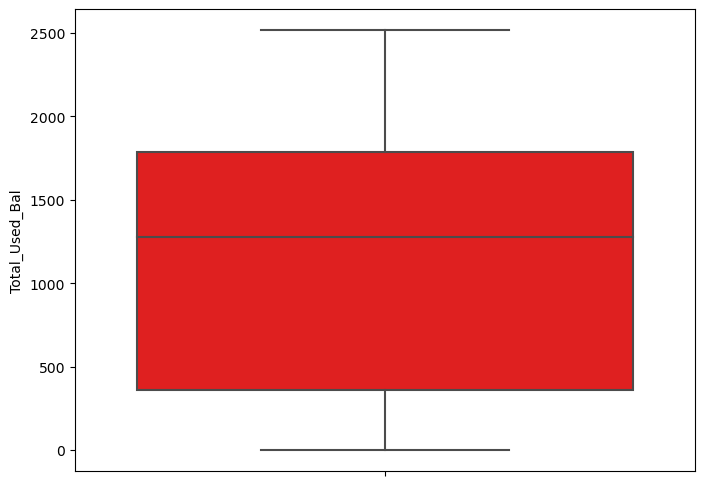

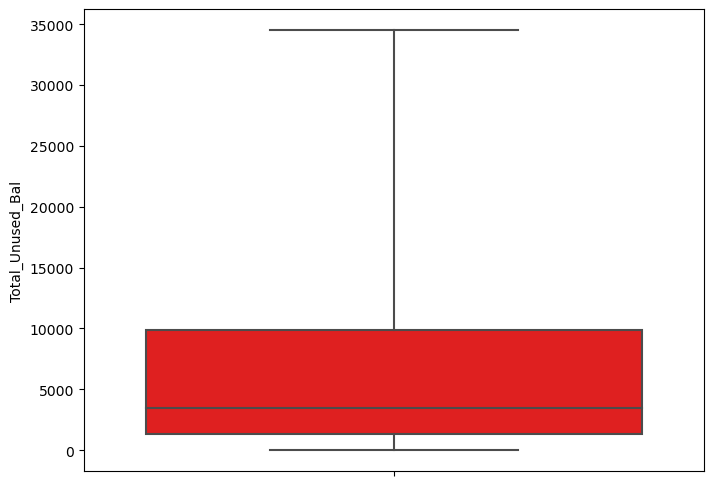

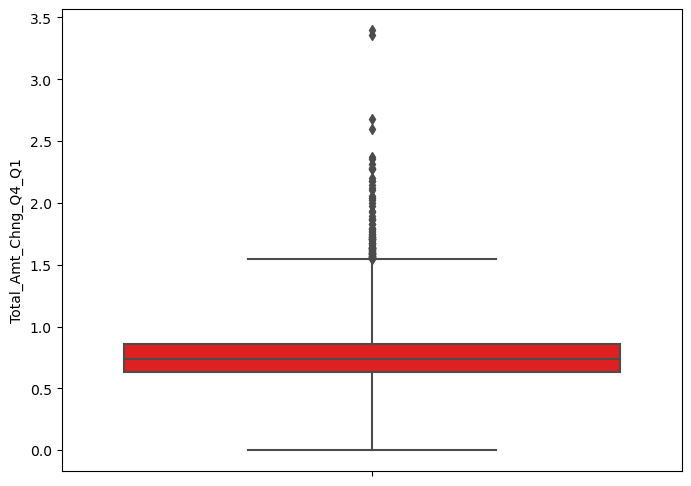

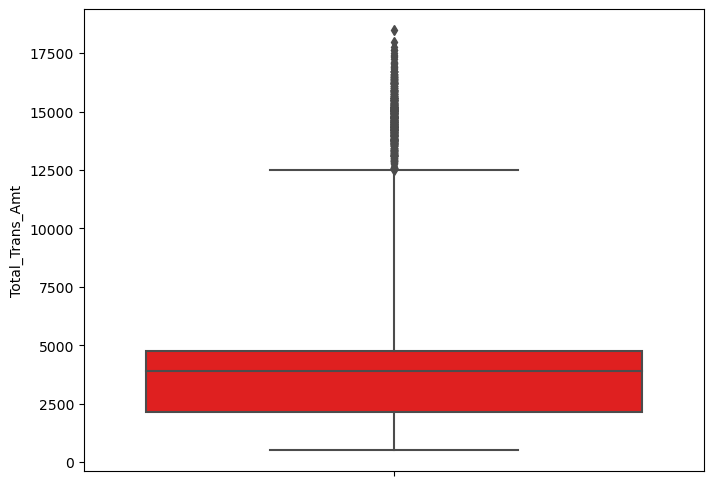

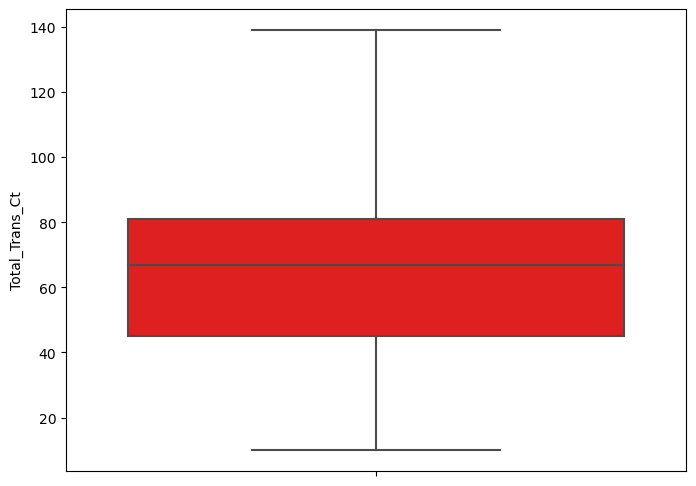

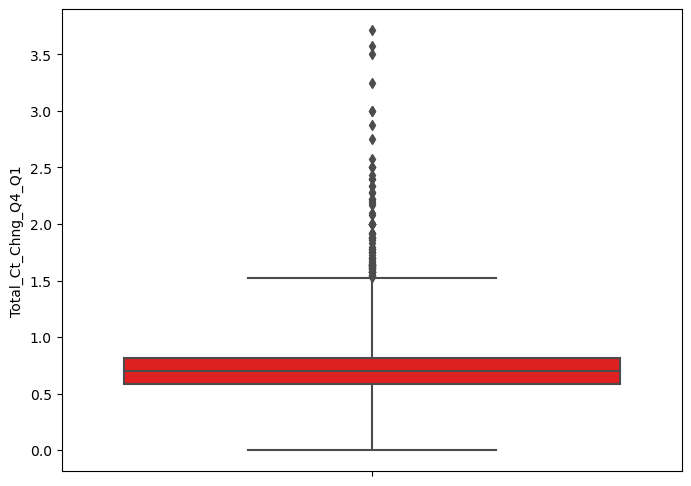

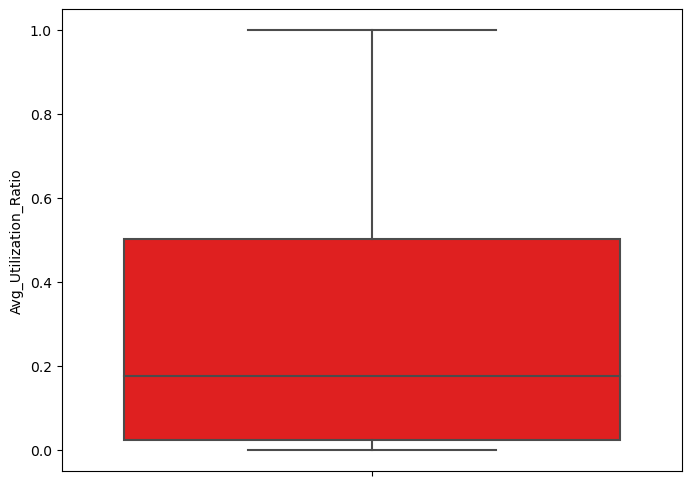

In [49]:
for col in numerical_columns:
    fig, ax = plt.subplots(figsize = (8,6))
    sns.boxplot(y = data[col], color = 'red', whis = 3)
    plt.show()

We can see the following:
- 'Total_Amt_Chng_Q4_Q1', which represents the change in transaction amount (Q4 over Q1) has outliers
- 'Total_Trans_Amt', which represents the total amount of payments made in last 12 moths has outliers
- 'Total_Ct_Chng_Q4_Q1' which represents the change in number of payments (Q4 over Q1) has outliers



Now, we want to extract the columns which have outliers

In [50]:
heavy_affected_by_outliers = ['Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']

We create a function to censor the outliers

In [51]:
def censoring_outliers(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 3*IQR
    upper_limit = q3 + 3*IQR
    #functie de mai jos functioneaza ca un if, else if, else
    dataframe[column] = np.where(dataframe[column] < lower_limit, lower_limit, np.where(dataframe[column] > upper_limit, upper_limit, dataframe[column]))

In [52]:
for variable in heavy_affected_by_outliers:
    censoring_outliers(data, variable)

e) Correlation

In [53]:
correlation = data[numerical_columns].corr()

In [54]:
correlation

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007555,0.007280,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.019504,-0.020926,-0.002961,0.007672,0.000266
Customer_Age,0.007555,1.000000,-0.122726,0.788891,-0.010931,0.054325,-0.018452,0.002556,0.014729,0.001234,-0.068957,-0.046037,-0.067088,-0.018825,0.007022
Dependent_count,0.007280,-0.122726,1.000000,-0.103872,-0.039495,-0.012156,-0.040394,0.068422,-0.003003,0.068676,-0.036795,0.033607,0.052085,0.010959,-0.037256
Months_on_book,0.134588,0.788891,-0.103872,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.055050,-0.037315,-0.049819,-0.018958,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039495,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.049542,-0.359299,-0.241891,0.041464,0.067663
Months_Inactive_12_mon,0.005729,0.054325,-0.012156,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032146,-0.036493,-0.042787,-0.043911,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040394,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.019470,-0.122814,-0.152213,-0.098280,-0.055471
Credit_Limit,0.005708,0.002556,0.068422,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012631,0.169344,0.075927,-0.006200,-0.482965
Total_Used_Bal,0.000825,0.014729,-0.003003,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.057863,0.059969,0.056060,0.095009,0.624022
Total_Unused_Bal,0.005633,0.001234,0.068676,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007441,0.163932,0.070885,-0.014717,-0.538808


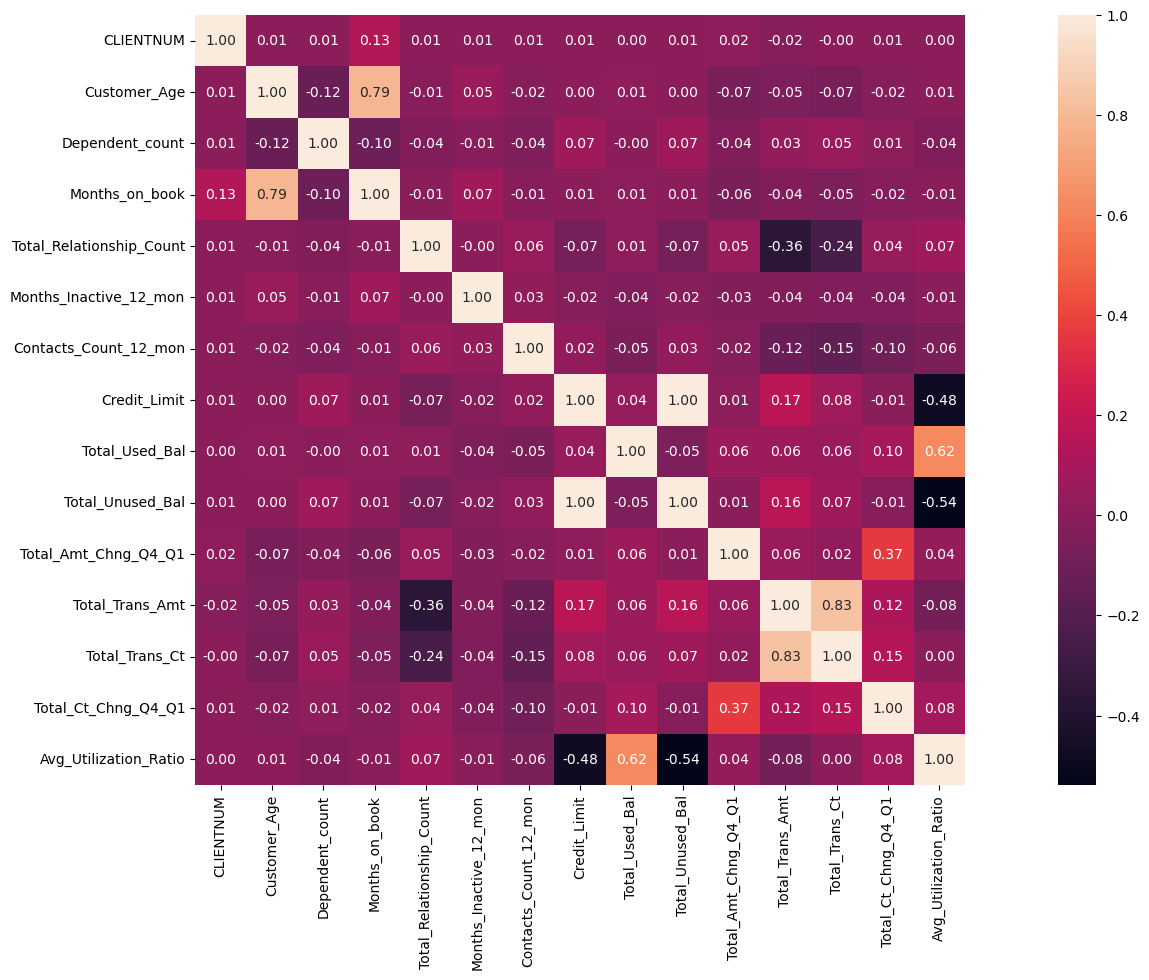

In [55]:
fix, ax = plt.subplots(figsize = (24, 10))
sns.heatmap(correlation, annot = True, square = True, fmt = '.2f')
plt.show()

We want to drop the columns with a correlation close to 1

In [56]:
columns_to_drop =[]

In [57]:
columns_to_drop.append('Total_Used_Bal')

numerical_columns.remove('Total_Used_Bal')

# E. Final dataset

In [58]:
print(columns_to_drop)

['Total_Used_Bal']


In [59]:
data = data.drop(columns = columns_to_drop)

After we delete the columns, we want to save the new dataset

In [60]:
data.to_csv("C:\\Users\\andre\\OneDrive\\Desktop\\Facultate\\Practica\\TTJ project\\dataset\\dataset_updated.csv")

# II. Model development

# A.Import libraries

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve

# B. Read dataset

In [62]:
data = pd.read_csv('C:\\Users\\andre\\OneDrive\\Desktop\\Facultate\\Practica\\TTJ project\\dataset\\dataset_updated.csv', index_col = 'Unnamed: 0')

In [63]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,11914.0,1.335,1144.0,42,1.526,0.061
1,818770008,0,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,7392.0,1.541,1291.0,33,1.526,0.105
2,713982108,0,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,3418.0,1.543,1887.0,20,1.526,0.000
3,769911858,0,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,796.0,1.405,1171.0,20,1.526,0.760
4,709106358,0,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,4716.0,1.543,816.0,28,1.526,0.000


# C. Classification

## 1. Declare independent variables and target variable

In [64]:
#independent variables
X = data.drop(columns = ['Attrition_Flag'])

#target variable
Y = data['Attrition_Flag']

In [65]:
X.shape, Y.shape

((10127, 19), (10127,))

In [66]:
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,11914.0,1.335,1144.0,42,1.526,0.061
1,818770008,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,7392.0,1.541,1291.0,33,1.526,0.105
2,713982108,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,3418.0,1.543,1887.0,20,1.526,0.000
3,769911858,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,796.0,1.405,1171.0,20,1.526,0.760
4,709106358,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,4716.0,1.543,816.0,28,1.526,0.000


## 2. Perform data preprocessing

a) We want to check if any categorical variable has a wide range of different values, in order to drop it before the categorical encoding

In [67]:
categorical_columns = [col for col in X.columns if X[col].dtype == 'object']

In [68]:
categorical_columns


['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [69]:
for col in categorical_columns:
    print(X[col].unique())

['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


We can see that no categorical column has a large amount of values so we don't need to drop any columns.

But, when we are going to train the model, the column 'CLIENTNUM' will provide no information and will not help us in finding the main reasons why the clients are leaving the bank. Because of this, we are goind to drop it before training the model.

In [70]:
X = X.drop(columns = ['CLIENTNUM'])

b)Categorical encoding

In [71]:
categorical_columns

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

Now, we are going to encode the categorical columns with dummy values.

In [72]:
X = pd.get_dummies(X, columns = categorical_columns)

In [73]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45.0,3.0,39,5,1,3,12691.0,11914.0,1.335,1144.0,...,0,0,1,0,0,0,1,0,0,0
1,49.0,5.0,44,6,1,2,8256.0,7392.0,1.541,1291.0,...,0,0,0,0,1,0,1,0,0,0
2,51.0,3.0,36,4,1,0,3418.0,3418.0,1.543,1887.0,...,0,0,0,1,0,0,1,0,0,0
3,40.0,4.0,34,3,4,1,3313.0,796.0,1.405,1171.0,...,0,0,0,0,1,0,1,0,0,0
4,40.0,3.0,21,5,1,0,4716.0,4716.0,1.543,816.0,...,0,0,1,0,0,0,1,0,0,0


We can now see that every analysed client will have additional columns that will take values between 0 and 1 and will show if they have that categorical value or not.

## 3. Split train and test sets

Now, we are goind to train and test the dataset, in order to assure that it can be replicated and generalized.

We are goind to make datasets both for testing and training the model.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 36), (2026, 36), (8101,), (2026,))

## 4.Random forest

In [76]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


#### 4.1 Train algorithm

a) Instantiate algorithm

In [77]:
rf = RandomForestClassifier(n_estimators = 300, max_depth = 5, n_jobs = -1, random_state = 123)

b) Train algorithm

In [78]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, n_jobs=-1,
                       random_state=123)

### 4.2 Predict results

In [79]:
#Here we will predict which clients will leave the company 
#1 -> they will leave
#0 ->They will not leave
y_predict = rf.predict(X_test)

In [80]:
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### 4.3 Performance metrics

a) Accuracy score

In [81]:
accuracy = accuracy_score(y_test, y_predict)

In [82]:
print('Accuracy score for Random Forest Classifier is: ', accuracy)

Accuracy score for Random Forest Classifier is:  0.9072063178677197


We can see that the accuracy score is good

b) Confusion matrix

In [83]:
cm =confusion_matrix(y_test, y_predict)
print(cm)

[[1698    7]
 [ 181  140]]


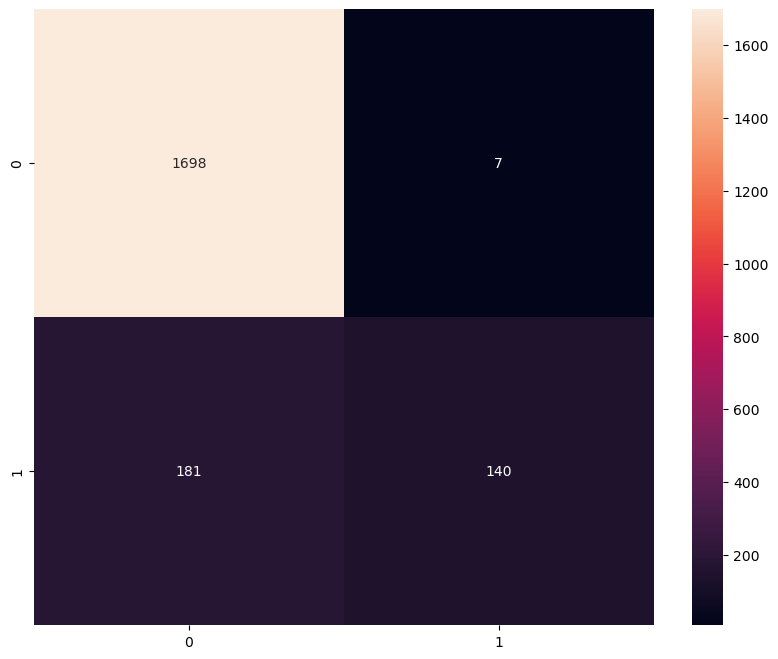

In [84]:
fix, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

We can see that when we applied Random Forest to test our data the following happended: <br>
- the algorithm successfully predicted that 1698 clients didn't leave the bank (True Negatives)
- the algorithm successfully predicted that 140 clients left the bank (True Positives)
- the aglorithm falsy predicted that 7 clients didn't leave the bank, when in reality, they left (False Negative)
- the aglorithm falsy predicted that 181 clients left the bank, when in reality, they didn't leave (False Positive)

c) Precision, recall

In [85]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
print('Precision: ', precision)
print('Recall score: ', recall)

Precision:  0.9523809523809523
Recall score:  0.43613707165109034


In [86]:
#Check for overfitting
y_train_predict = rf.predict(X_train)

In [87]:
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
print('Precision: ', precision)
print('Recall score: ', recall)

Precision:  0.9542097488921714
Recall score:  0.4946401225114854


In [88]:
auc_score = roc_auc_score(y_test, y_predict)
print('AUC score is: ', auc_score)

AUC score is:  0.7160157499017915


The AUC score of of the model is low, so it shows that the model is not very accurate

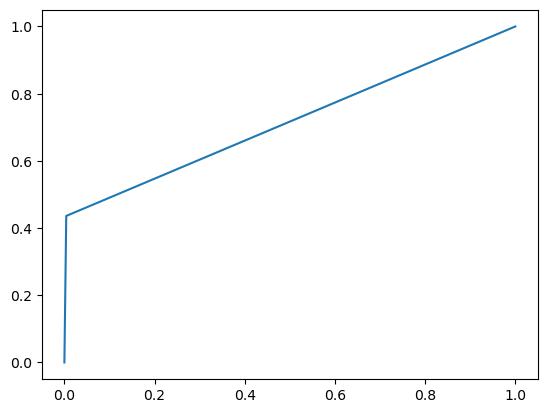

In [89]:
#fpr ->false positive rate
#tpr ->true positive rare
fpr, tpr, threshold = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)

## 5. XGBoost( Extreme Gradient Boosting)

### 5.1 Train algorithm


In [90]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: Optional[bool] = None, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |      learnin

In [91]:
xgb = XGBClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.1, n_jobs = -1, random_state = 10)

In [92]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

### 5.2 Predict results

In [93]:
y_predict = xgb.predict(X_test)

### 5.3 Performance metrics

a)Accuracy score

In [94]:
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy for XGB is: ', accuracy)

Accuracy for XGB is:  0.9634748272458046


We can see that the accuracy score for XGB much higher that the model trained using Random Forest

b) Confusion matrix

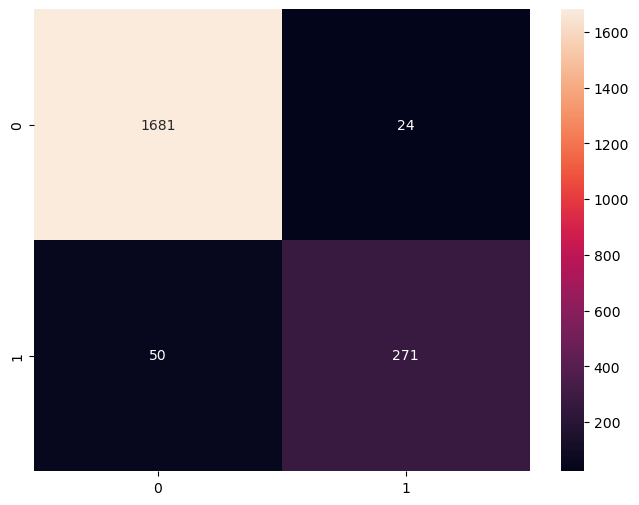

In [95]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

We can see that we have more values in the True Positive square (271), and less in the False Positive square (50), which means that the model is better and more accurate that the one trained using Random Forest.

c) Precision, recall

In [96]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
print('Precision ', precision)
print('Recall ', recall)

Precision  0.9186440677966101
Recall  0.8442367601246106


We can see that the Recall is significative higher than Random Forest

In [97]:
auc_score = roc_auc_score(y_test, y_predict)
print('AUC score', auc_score)

AUC score 0.9150802568951499


e) Check for overfitting /underfitting

In [98]:
y_predict_train = xgb.predict(X_train)
y_predict_test = xgb.predict(X_test)

auc_score_train = roc_auc_score(y_train, y_predict_train)
auc_score_test = roc_auc_score(y_test, y_predict_test)

print('AUC train', auc_score_train)
print('AUC test', auc_score_test)

AUC train 0.9615989258834811
AUC test 0.9150802568951499


The difference between the AUC score of the train set and the test set is very low, so overfitting doesn't occur.

We can conclusionate that XGBoost is better than Random Forest

# 6. Hyperparameters tuning

We want to see if we can find any parameters that will create a more accurate XGBoost Model

a) Declare possbile values for hyperparameters of XGBoost

In [99]:
n_estimators = [200,250,300, 450, 500, 550, 600, 650, 700 ] 
max_depth = [3, 4, 5, 6] 
learning_rate = [0.1, 0.05, 0.2, 0.3, 0.4]

b) Find the best hyperparameters

We want to create all combinations of parameters and see the auc score for every combination in order to determine if there is a better combination of parameters than the one already used

In [100]:
results = []
for est in n_estimators:
    for md in max_depth:
        for lr in learning_rate:
            xgb = XGBClassifier(n_estimators = est, max_depth = md, learning_rate = lr, n_jobs = -1, random_state = 10, subsample = 0.6, colsample_bytree = 0.5)
            xgb.fit(X_train, y_train)
            y_predict = xgb.predict(X_test)
            auc_score = roc_auc_score(y_test, y_predict)
            results.append(['estimator', est, 'max_depth', md, 'learning_rate', lr, 'auc', auc_score])

After we have built various combinations of parameters for the mode, we want to choose the one with the biggest AUC score

In [101]:
max_result = max(results, key=lambda x: x[7])
max_result

['estimator',
 700,
 'max_depth',
 5,
 'learning_rate',
 0.4,
 'auc',
 0.9363006002137747]

We see that the models with the parameters: 'estimator': 700, 'max_depth': 5, 'learning_rate': 0.4 has an AUC Score of 0.9363006002137747 that is far greater that the one we obtained initially.

Even if it has a better AUC Score, we want to check for overfitting

In [102]:
best_model = XGBClassifier(n_estimators = 700, max_depth = 5, learning_rate = 0.4, n_jobs = -1, subsample = 0.6, colsample_bytree = 0.5, random_state = 123)
best_model.fit(X_train, y_train)
y_predict_train = best_model.predict(X_train)
y_predict_test = best_model.predict(X_test)
auc_score_train = roc_auc_score(y_train, y_predict_train)
auc_score_test = roc_auc_score(y_test, y_predict_test)
print('AUC train', auc_score_train)
print('AUC test', auc_score_test)

AUC train 1.0
AUC test 0.9151716136340798


We can see that the difference is significant, so the model is overfitting the training data

I will create a function that will test every possbile combination of parameters that I have created and will print the parameters only if they are not overfitting

In [103]:
def find_model_parameters(combination):
    best_model = XGBClassifier(n_estimators = combination[1], max_depth = combination[3], learning_rate = combination[5], n_jobs = -1, subsample = 0.6, colsample_bytree = 0.5, random_state = 123)
    best_model.fit(X_train, y_train)
    y_predict_train = best_model.predict(X_train)
    y_predict_test = best_model.predict(X_test)
    auc_score_train = roc_auc_score(y_train, y_predict_train)
    auc_score_test = roc_auc_score(y_test, y_predict_test)
    if auc_score_train - auc_score_test < 0.04:
        print('Model parameters: n_estimators:', combination[1], 'max_depth:', combination[3], 'learning rate:', combination[5] )
        print('MODEL AUC SCORE: ', combination[7])
        print('AUC train', auc_score_train)
        print('AUC test', auc_score_test)        
        print()

In [104]:
for combination in results:
    find_model_parameters(combination)

Model parameters: n_estimators: 200 max_depth: 3 learning rate: 0.05
MODEL AUC SCORE:  0.8960954129781384
AUC train 0.9293671479456902
AUC test 0.893859913576525

Model parameters: n_estimators: 200 max_depth: 4 learning rate: 0.05
MODEL AUC SCORE:  0.9088497273001344
AUC train 0.9515862149788095
AUC test 0.9125515023615717

Model parameters: n_estimators: 250 max_depth: 3 learning rate: 0.05
MODEL AUC SCORE:  0.903590319839943
AUC train 0.9383784807088358
AUC test 0.9000904431715405



We can see that using the following parameters: n_estimators: 250, max_depth: 3 and learning rate: 0.05 we obtained an AUC score of 0.9035 and the model is not overfitting

In [105]:
best_model = XGBClassifier(n_estimators = 250, max_depth = 3, learning_rate = 0.05, n_jobs = -1, subsample = 0.6, colsample_bytree = 0.5, random_state = 123)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

## 7. Save the model

In [106]:
import pickle 
with open('C:\\Users\\andre\\OneDrive\\Desktop\\Facultate\\Practica\\TTJ project\\dataset\\final_model_v1.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# III Model Explainability

# A. Explainability

## 1. Import saved model

In [107]:
with open('C:\\Users\\andre\\OneDrive\\Desktop\\Facultate\\Practica\\TTJ project\\dataset\\final_model_v1.pkl', 'rb') as file:
    model = pickle.load(file)

## 2. Predict

In [108]:
#predict
y_predict = model.predict(X_test)

In [109]:
y_predict

array([0, 0, 0, ..., 1, 0, 0])

Predict the likelihood of the target variable (propensity probabilities)

In [110]:
y_predict_proba = model.predict_proba(X_test)

In [111]:
y_predict_proba

array([[0.91297233, 0.08702766],
       [0.9866538 , 0.0133462 ],
       [0.9879942 , 0.01200583],
       ...,
       [0.02666456, 0.97333544],
       [0.99660164, 0.00339838],
       [0.9496148 , 0.05038517]], dtype=float32)

Out of the two probabilities, we are interested in probabilites of class 1

In [112]:
y_predict_proba_class_1 = y_predict_proba[:, 1]

In [113]:
y_predict_proba_class_1

array([0.08702766, 0.0133462 , 0.01200583, ..., 0.97333544, 0.00339838,
       0.05038517], dtype=float32)

## 4. Performance metrics

### 4.1 AUC score for probabilities

In [114]:
auc_score = roc_auc_score(y_test, y_predict_proba_class_1)
print(auc_score)

0.9895798503576616


We can see that the AUC score for probabilities is very good.

## 4.2 Lift si Gain analysis

In [115]:
#declare an empty DataFrame
lift_gain_report = pd.DataFrame()

#add y_test in DataFrame
lift_gain_report['y_test'] = y_test

###STEP 1###
#add predict probabilities for class 1 in DataFrame
lift_gain_report['Predicted Probabilities'] = y_predict_proba_class_1

# order probabilities in ascending order
lift_gain_report['Probabilities Rank'] = lift_gain_report['Predicted Probabilities'].rank(method = 'first', ascending = True, pct = True)

### STEP 2 ###
##calculate decile group (calculam decilele (valori 1-10))
lift_gain_report['Decile group'] = np.floor((1 - lift_gain_report['Probabilities Rank']) *10) +1

### STEP 3 ###
#group observations by decile
lift_gain_report['Number of observations'] = 1
lift_gain_report = lift_gain_report.groupby(['Decile group']).sum().reset_index() #vedem cate valori avem in fiecare decila
#gruparea pe decile tre sa dea aproximativ aceleasi valori

#cumulative number of observations
lift_gain_report['Cumulative no. of observations'] = lift_gain_report['Number of observations'].cumsum()

#cumulative percentage of observations
lift_gain_report['Cumulative % of no. of observations'] = lift_gain_report['Cumulative no. of observations'] / lift_gain_report['Cumulative no. of observations'].max()

### STEP 4 ###
#calculate number of positives
lift_gain_report['Cumulative no. of positives'] = lift_gain_report['y_test'].cumsum()

### STEP 5 ###
#calculate cumulative percentage of positives(Gain)
lift_gain_report['Gain'] = lift_gain_report['Cumulative no. of positives'] /lift_gain_report['Cumulative no. of positives'].max()

##STEP 6 ###
#calculate Lift
lift_gain_report['Lift'] = lift_gain_report['Gain'] /lift_gain_report['Cumulative % of no. of observations']

lift_gain_report

,Decile group,y_test,Predicted Probabilities,Probabilities Rank,Number of observations,Cumulative no. of observations,Cumulative % of no. of observations,Cumulative no. of positives,Gain,Lift
0,1.0,198,187.953812,192.880059,203,203,0.100197,198,0.616822,6.156070
1,2.0,108,92.283203,172.539980,203,406,0.200395,306,0.953271,4.756963
2,3.0,13,21.293791,151.500000,202,608,0.300099,319,0.993769,3.311475
3,4.0,2,8.412931,131.960020,203,811,0.400296,321,1.000000,2.498150
4,5.0,0,3.732983,111.119941,202,1013,0.500000,321,1.000000,2.000000
5,6.0,0,1.986463,91.380059,203,1216,0.600197,321,1.000000,1.666118
6,7.0,0,1.119270,71.039980,203,1419,0.700395,321,1.000000,1.427766
7,8.0,0,0.702266,50.500000,202,1621,0.800099,321,1.000000,1.249846
8,9.0,0,0.464188,30.460020,203,1824,0.900296,321,1.000000,1.110746
9,10.0,0,0.274095,10.119941,202,2026,1.000000,321,1.000000,1.000000


### 4.3 Lift and Gain charts

a) Lift chart

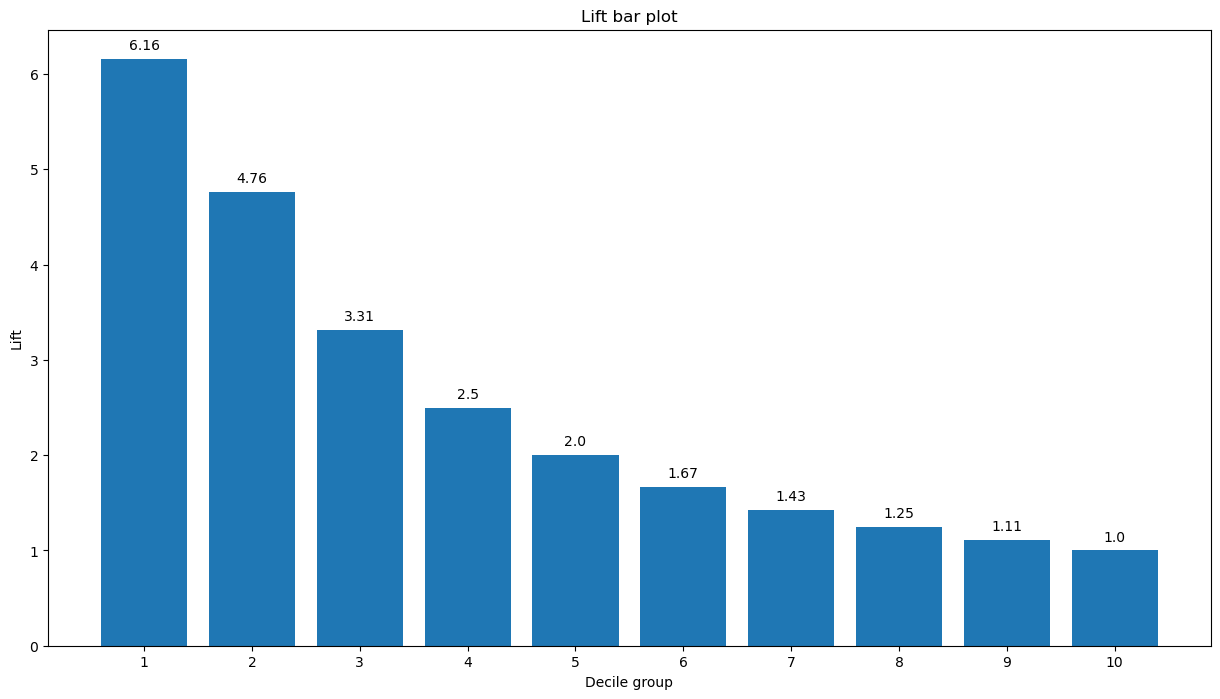

In [116]:
fig, ax = plt.subplots(figsize = (15, 8))
barplot = plt.bar(lift_gain_report['Decile group'], lift_gain_report['Lift'])
plt.title('Lift bar plot')
plt.xlabel('Decile group')
plt.ylabel('Lift')
plt.xticks(lift_gain_report['Decile group'])


#add text about bars in chart
for b in barplot:
    plt.text(b.get_x() + b.get_width() / 2, b.get_height() + 0.1, round(b.get_height(), 2), ha = 'center')

plt.show()

From the chart above we can see the follosing things:
- If we are going to target the first decile, the model would increase its accuracy and performance 6.16 times
- If we are going to target the second decile, the model would increase its accuracy and performance 4.76 times
- If we are going to target the third decile, the model would increase its accuracy and performance 3.31 times

b) Gain chart

We add a column that will show what would happen if the algorithm would be random

In [117]:
lift_gain_report['Random_selection'] = lift_gain_report['Decile group'] /lift_gain_report['Decile group'].max()

In [118]:
lift_gain_report

,Decile group,y_test,Predicted Probabilities,Probabilities Rank,Number of observations,Cumulative no. of observations,Cumulative % of no. of observations,Cumulative no. of positives,Gain,Lift,Random_selection
0,1.0,198,187.953812,192.880059,203,203,0.100197,198,0.616822,6.156070,0.1
1,2.0,108,92.283203,172.539980,203,406,0.200395,306,0.953271,4.756963,0.2
2,3.0,13,21.293791,151.500000,202,608,0.300099,319,0.993769,3.311475,0.3
3,4.0,2,8.412931,131.960020,203,811,0.400296,321,1.000000,2.498150,0.4
4,5.0,0,3.732983,111.119941,202,1013,0.500000,321,1.000000,2.000000,0.5
5,6.0,0,1.986463,91.380059,203,1216,0.600197,321,1.000000,1.666118,0.6
6,7.0,0,1.119270,71.039980,203,1419,0.700395,321,1.000000,1.427766,0.7
7,8.0,0,0.702266,50.500000,202,1621,0.800099,321,1.000000,1.249846,0.8
8,9.0,0,0.464188,30.460020,203,1824,0.900296,321,1.000000,1.110746,0.9
9,10.0,0,0.274095,10.119941,202,2026,1.000000,321,1.000000,1.000000,1.0


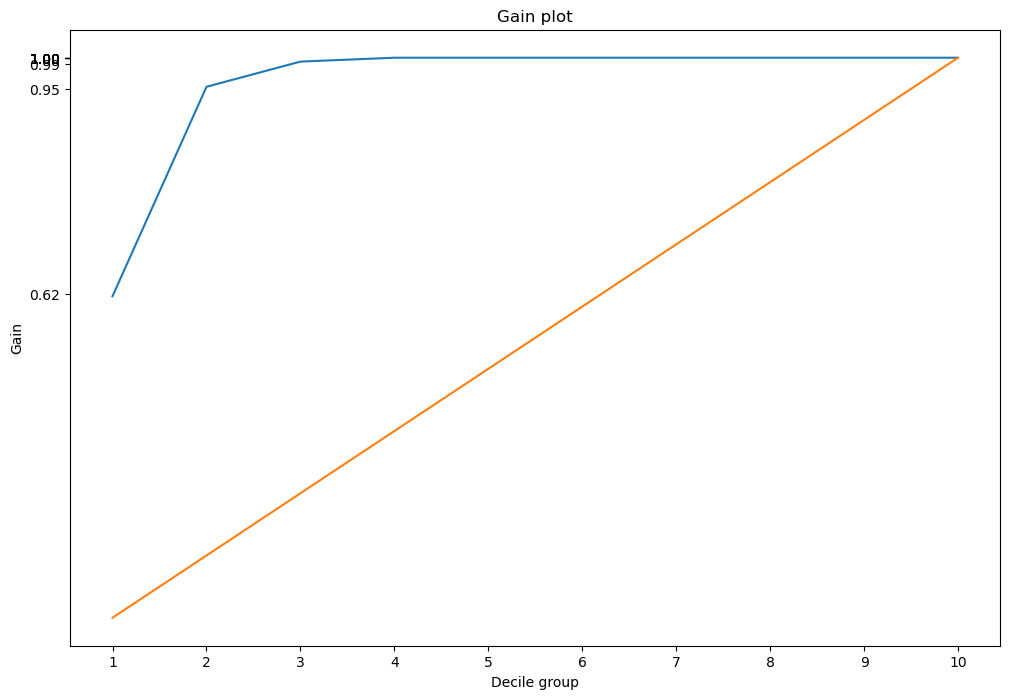

In [119]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(data = lift_gain_report, x = lift_gain_report['Decile group'], y = lift_gain_report['Gain'])
sns.lineplot(data = lift_gain_report, x = lift_gain_report['Decile group'], y = lift_gain_report['Random_selection'])
plt.title('Gain plot')
plt.xticks(lift_gain_report['Decile group'])
plt.yticks(round(lift_gain_report['Gain'], 2))
plt.show()

From the cumulative gain chart above, we can see that: <br> 
- if we are going to target the first decile, we are going to reach 62% of the potential customers that might leave
- if we are going to target the first 2 deciles, the probability to reach the target customers increases to 95%
- if we are going to target the first 3 deciles, we would reach 99% of our target customers

## 5. Feature importance

We want to see the importance of each variable in our model, regarding their effect on our target variable, 'Attrition_Flag.

## 5.2 Feature importance analysis

In [120]:
feat_imp = model.get_booster().get_score(importance_type = 'total_gain')

In [121]:
feat_imp

{'Customer_Age': 959.4922485351562,
 'Dependent_count': 89.08824920654297,
 'Months_on_book': 325.77703857421875,
 'Total_Relationship_Count': 3177.576416015625,
 'Months_Inactive_12_mon': 1050.7550048828125,
 'Contacts_Count_12_mon': 786.6497802734375,
 'Credit_Limit': 572.432373046875,
 'Total_Unused_Bal': 288.1288146972656,
 'Total_Amt_Chng_Q4_Q1': 2289.021728515625,
 'Total_Trans_Amt': 9173.6806640625,
 'Total_Trans_Ct': 10364.1630859375,
 'Total_Ct_Chng_Q4_Q1': 3705.56884765625,
 'Avg_Utilization_Ratio': 3276.7138671875,
 'Gender_F': 238.2049102783203,
 'Gender_M': 84.70777893066406,
 'Education_Level_College': 5.395151615142822,
 'Education_Level_Graduate': 0.9412012100219727,
 'Education_Level_High School': 2.45845103263855,
 'Education_Level_Post-Graduate': 2.145519256591797,
 'Education_Level_Uneducated': 3.745628833770752,
 'Education_Level_Unknown': 2.25209903717041,
 'Marital_Status_Married': 131.49627685546875,
 'Marital_Status_Single': 27.550949096679688,
 'Marital_Status

Above, we can see all the variables in our model

We want to arrange the variables and their importance in a DataFrame

In [122]:
feature_importance = pd.DataFrame()
feature_importance['Variable'] = feat_imp.keys()
feature_importance['Importance value'] = feat_imp.values() 
feature_importance['%Importance value'] = feature_importance['Importance value'] / feature_importance['Importance value'].sum() *100
feature_importance.sort_values(by = ['Importance value'], ascending = False)

,Variable,Importance value,%Importance value
10,Total_Trans_Ct,10364.163086,28.323948
9,Total_Trans_Amt,9173.680664,25.070510
11,Total_Ct_Chng_Q4_Q1,3705.568848,10.126851
12,Avg_Utilization_Ratio,3276.713867,8.954845
3,Total_Relationship_Count,3177.576416,8.683915
8,Total_Amt_Chng_Q4_Q1,2289.021729,6.255607
4,Months_Inactive_12_mon,1050.755005,2.871581
0,Customer_Age,959.492249,2.622171
5,Contacts_Count_12_mon,786.649780,2.149814
6,Credit_Limit,572.432373,1.564385


We can see that the most important variables in our model are:<br>
- 'Total_Trans_Ct' which represents the total number of payments made in the last 12 months, and has an importance of 28.323% when analyzing why the clients are leaving
- 'Total_Trans_Amt', which represents the total amount of payments made in the last 12 months, and has an importance of 19.56%

## 5.2 SHAP chart

In [123]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


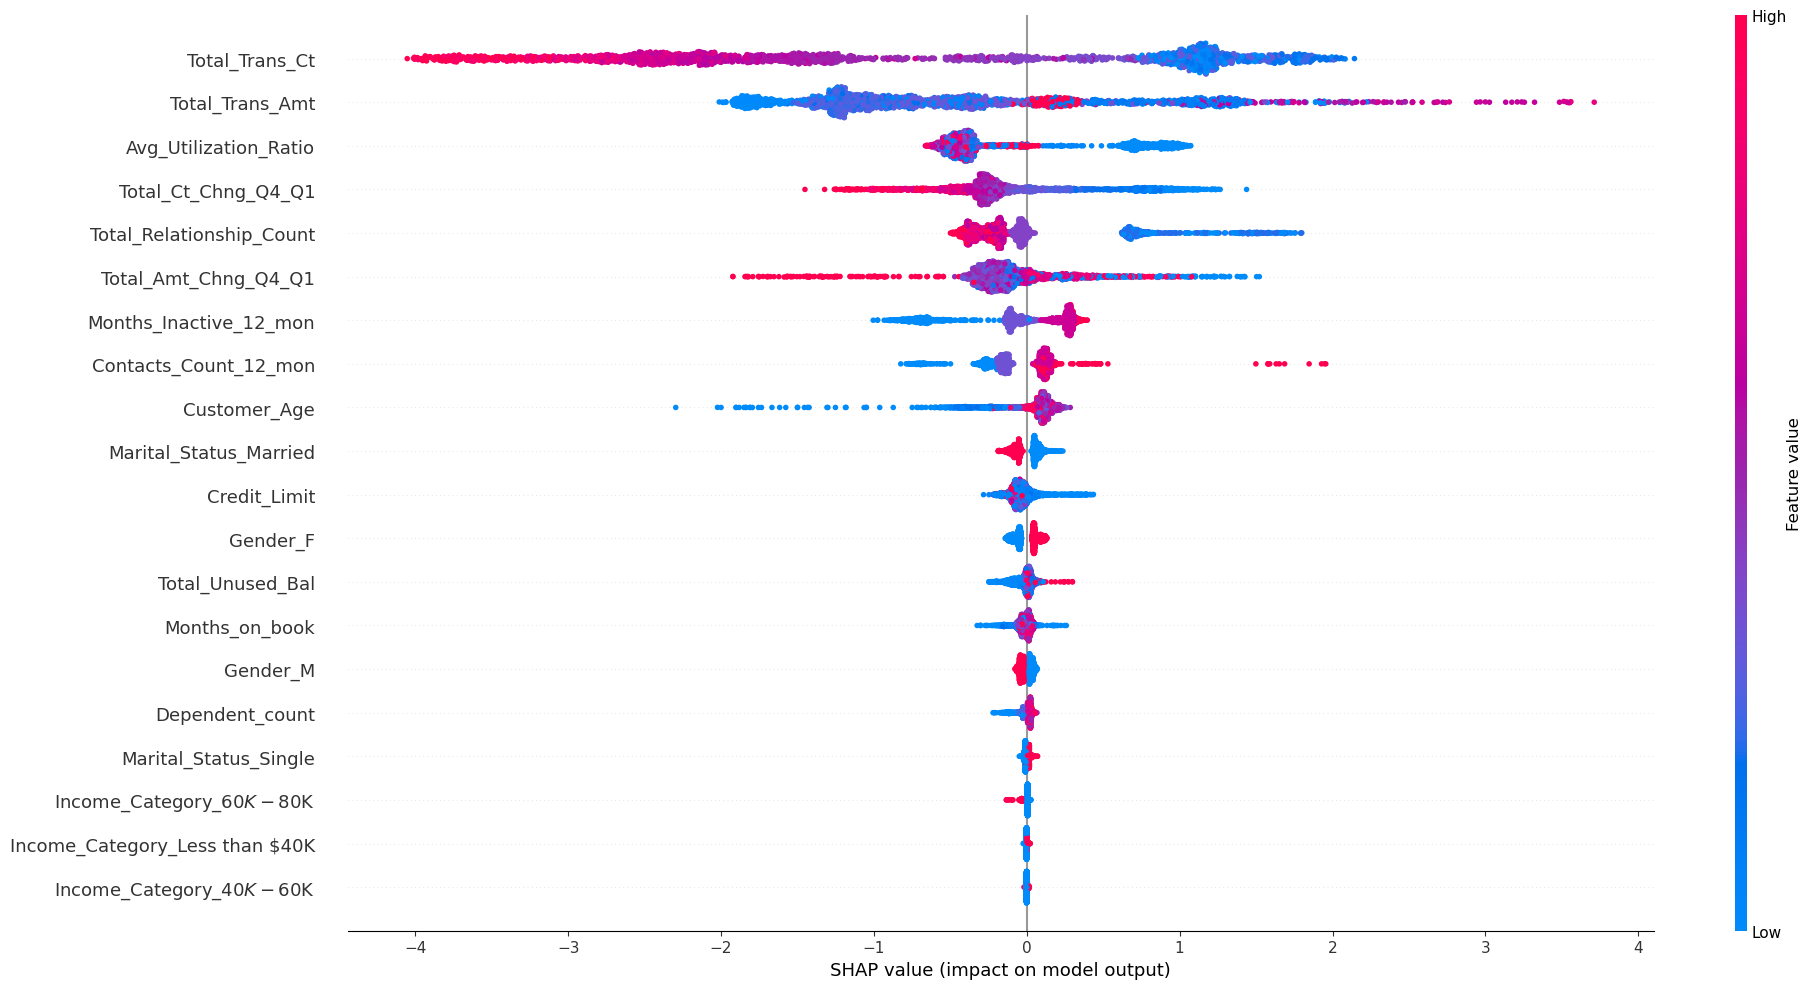

In [124]:
shap.summary_plot(shap_values, X_test, plot_size = (20, 10))

From the SHAP chart, we can see the following things:<br>
- If the number of payments made in the last 12 months is low (Total_Trans_Ct), there is a very high chance that the person is going to leave the bank. If the amount of payments is high, there is a small probability of the client leaving Delta Bank.
- If the total amount of payments made in the last 12 months is low (Total_Trans_Amt), the chance of the client leaving the bank is low. On the other hand, if the client has made a lot of payments in the last 12 months, there is a very high chance of him leaving the bank. This could happen maybe because he is trying to move his money to another bank, or he is withdrawing his money in cash from an ATM in order to move them to another bank.
- If the client has a small number of inactive months (Months_Inactive_12_mon), there is a small chance of him leaving the Bank. On the other hand, we can see that a large number of months of inactivity among the last 12, results in a higher chance of the client leaving the bank.
- If the client has a large number of products in the portfolio (Total_Relationship_Count), there is a small chance of him leaving the bank, whereas, clients with a small number of products are more likely to leave the bank. This behavior is natural and can occure mainly because people who have a large portfolio of products in Delta Bank, build a stronger relationship with the bank based on trust, and they are more likely to stay with our clients for a long time.
- We can see that if the client is younger, there is a smaller probability of him leaving the bank. This is maybe because young people often don't have large deposits so they don't care about interest rates, they only want to work with a bank that can help them spend their money on daily expenses.

In the next step, we want to see how variables affect inidividual clients probability of them leaving Delta Bank

To achieve this, we will extract independent clients and we will analyse how every variable affects their individual decision of leaving the bank.

In [125]:
index = 238
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index])

We will analyze the client from index 238, which the model predicted that he/she will leave the bank: (value 1)<br>

- We can see that one of the most important factors that influenced the algorithm im predicting that the client is going to leave the Bank was driven by the number of total transactions of the last months(Total_Trans_Ct) with a value of 44 and the total amount of the transactions of the last 12 months(Total_Trans_Amt), which has a value of 2308. I believe that this behavior occurred because the client tried to move his money to another Bank, and this is why he transferred or withdrew his money in the last 12 months.
- We can see that the client spent 0% of his credit limit(Avg_Utilization_Ratio) and this probably means that he is already using another card from another Bank, and this is why he is no longer using Delta Bank's products.
- Another important factor that influenced the client's decision to leave the bank was the change in the number of payments( Total_Ct_Chng_Q4_Q1) which has a value of 0.467 which means that the client has made 46,7% more payments, which strengthens my theory that this could be based on the fact that the client is trying to move his money to another account or withdraw his money before leaving Delta Bank.
- The only thing that the model took into consideration as a variable that could indicate that the client is not going to leave is the total number of inactive months(Months_Inactive_12_mon), with a value of 1, which means that the client had only 1 month of inactivity the last year. However, I believe that most of this activity was only the client moving his money to other accounts and withdrawing them in order to move to another Bank.

In [126]:
index = 239
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index])

We will analyze the client from index 238, which the model predicted that he/she will not leave the bank: (value 0)<br>
- We can see that because the client has used 12% of his credit limit (Avg_Utilization_Ratio) on average, means that he is still using our products so there is a small probability of him leaving the bank.
- Moreover, we can see that his total amount of payments made in the last 12 months is 1463 (Total_Trans_Amt), which is low, so, the algorithm predicted that he is not trying to move the money to another bank.
- He had 3 months of inactivity, which the algorithm interpreted as a raised chance of the client leaving the bank. However, my opinion is that this is a normal amount of inactive months, and this not be a reason for concern.

# Conclusions

In my view, the model and trained algorithm were successful in predicting the primary reasons why people leave Delta Bank.

The first indicator that a client may leave the bank is a sudden increase in the total amount of payments made over the last year. Such a surge could suggest that the client is quickly transferring funds to another bank, and thus, a significant change in the amount transferred or withdrawn is a sign that we should consider.

Additionally, the model predicted that we should closely monitor the total number of inactive months. These months could indicate that a client is preparing to leave or is no longer using our products, which means that it is only a matter of time before they leave.

Our analysis also revealed that a small portfolio of products could influence a client's decision to leave the bank. Therefore, we should diversify our products to make them more attractive to clients, promote them among both young and mature audiences, and offer special interest rates to older clients who deposit their pensions with us. Another potential strategy is to introduce cashback programs for various products and stores, targeting both young and old clients. Cashback incentives could increase purchases made with our cards and decrease the probability of clients leaving Delta Bank.

Furthermore, monitoring a client's activity to determine how many active months they had in the previous year could alert us to potential churn risks. If a client has been inactive for a long period, we could send them emails or messages highlighting various benefits, cashback, and promotions they could receive if they use our products. This approach may make clients more active and reduce their likelihood of leaving Delta Bank.
